<a href="https://colab.research.google.com/github/SravanPuvvada/learn/blob/main/Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


# **Python projects**

In [ ]:
print(1)

1


In [ ]:
##Timer Game

import time
allocated_time=0.6
start_time=time.time()
Game_over=False

while Game_over==False:
  time.sleep(2)

  elapsed_time=time.time()-start_time

  if elapsed_time>allocated_time:
    Game_over==True


print("Game_over")



In [ ]:
import pandas as pd
data=pd.read_csv("advertising.csv")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

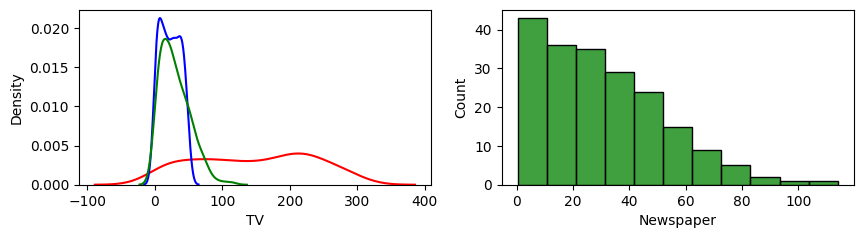

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.kdeplot(data["TV"], color ="red" , label="TV")
sns.kdeplot(data["Radio"], color="blue" , label="Radio")
sns.kdeplot(data["Newspaper"],color="green" , label="Newspaper")


plt.subplot(2,2,2)
#sns.histplot(data["TV"],color ="red" , label="TV")
#sns.histplot(data["Radio"],color="blue" , label="Radio")
sns.histplot(data["Newspaper"],color="green" , label="Newspaper")
plt.show()

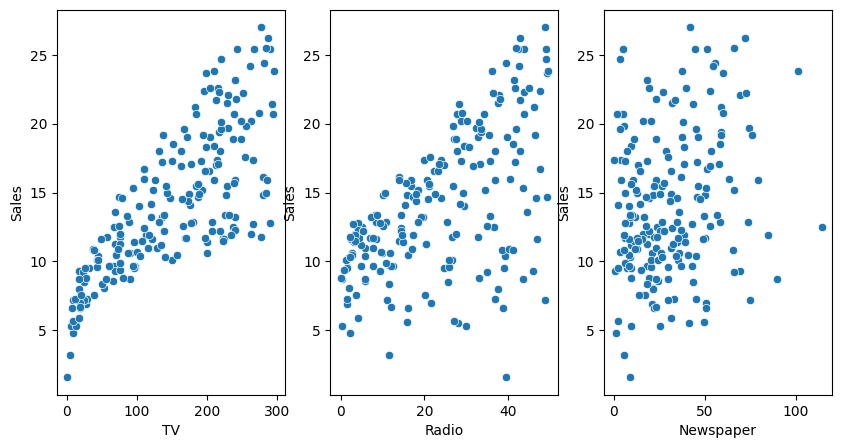

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
sns.scatterplot(x=data["TV"],y=data["Sales"])

plt.subplot(1,3,2)
sns.scatterplot(x=data["Radio"],y=data["Sales"])

plt.subplot(1,3,3)
sns.scatterplot(x=data["Newspaper"],y=data["Sales"])
plt.show()

In [ ]:
data.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

<Axes: >

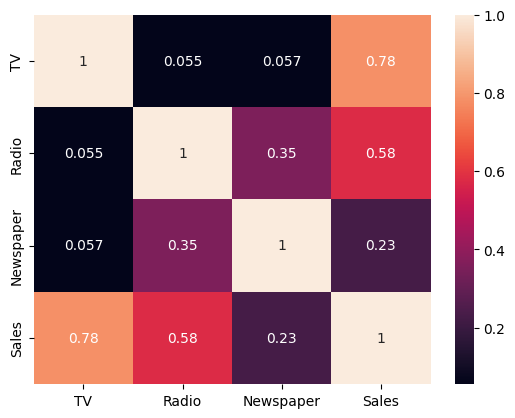

In [ ]:
sns.heatmap(data.corr(),annot=True)

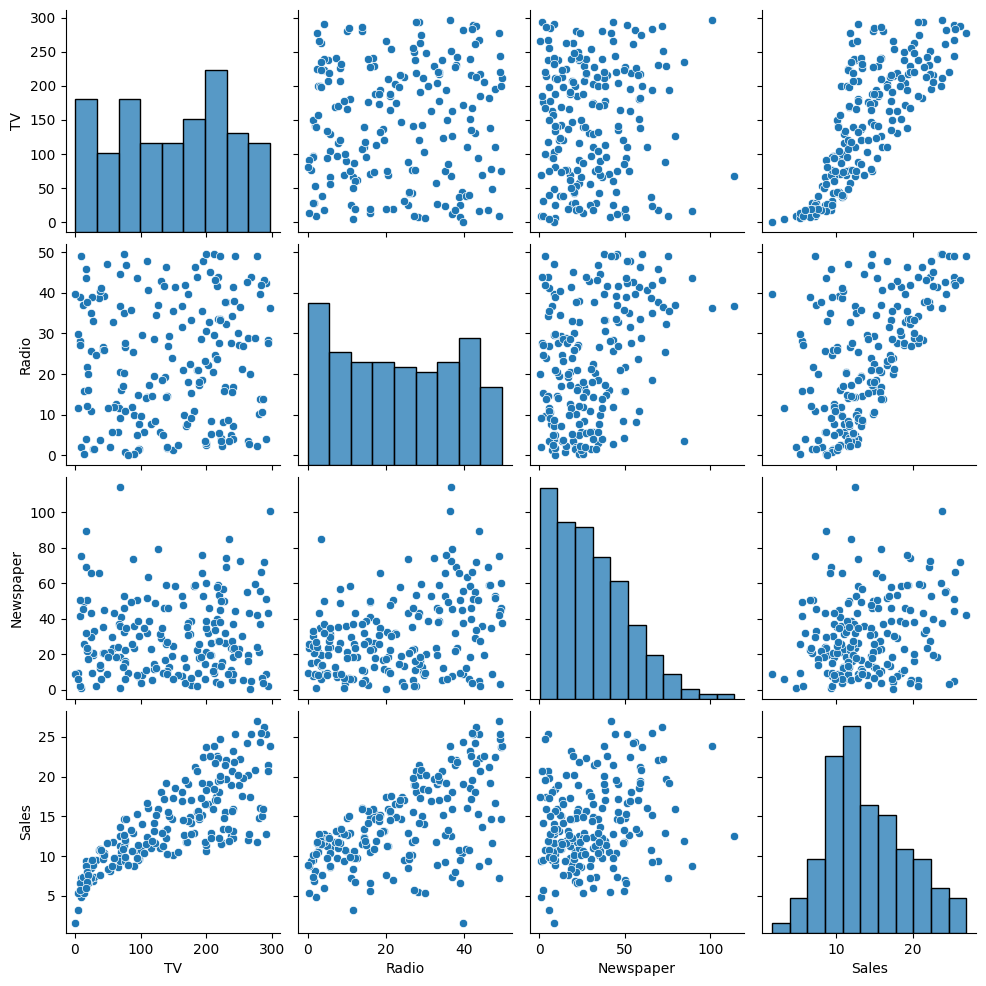

In [ ]:
sns.pairplot(data)

In [ ]:
X=data[["TV","Radio","Newspaper"]]
y=data["Sales"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# **LR model 1**

In [ ]:
from sklearn.linear_model import LinearRegression
model =LinearRegression()
lr1=model.fit(X_train, y_train)


In [ ]:
(model.coef_ ,model.intercept_)

(array([0.04472952, 0.18919505, 0.00276111]), 2.979067338122629)

In [ ]:
pd.DataFrame(model.coef_)

0
0  0.044730
1  0.189195
2  0.002761

In [ ]:
y_hat=model.predict(X_test)

<Axes: xlabel='Sales'>

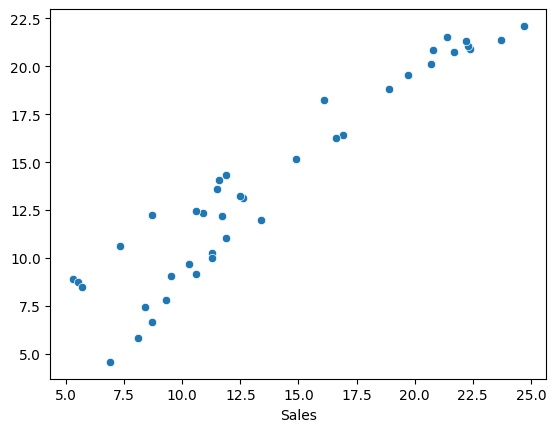

In [ ]:
sns.scatterplot(x=y_test,y=y_hat)

In [ ]:
y_train_hat=model.predict(X_train)

<Axes: xlabel='Sales'>

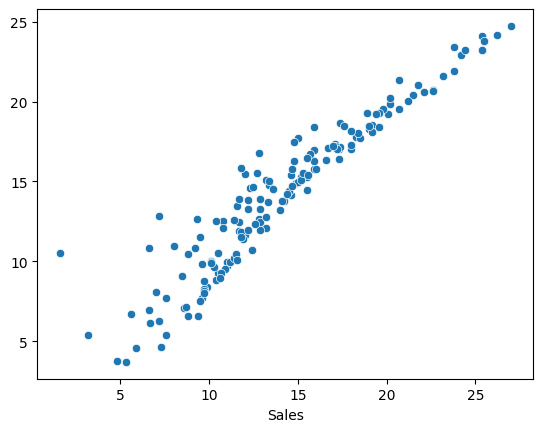

In [ ]:
sns.scatterplot(x=y_train,y=y_train_hat)

In [ ]:
lr.predict(X_train).shape

(160,)

In [ ]:
X_train.shape

(160, 3)

In [ ]:
model.score(X_test , y_test)

0.899438024100912

In [ ]:
model.score(X_train , y_train)

0.8957008271017818

Text(0, 0.5, 'Sales')

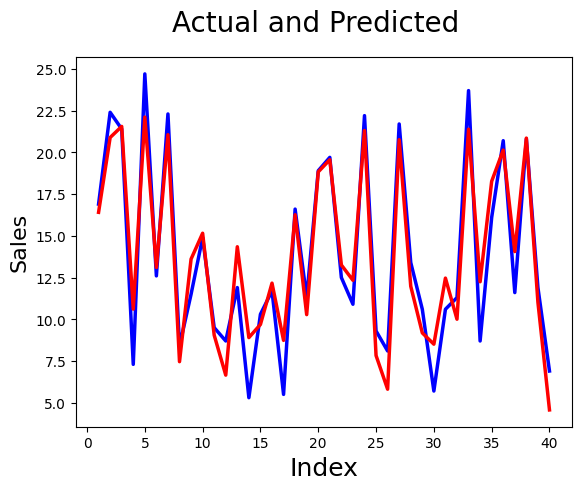

In [ ]:
c = [i for i in range(1,41,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_hat, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)

In [ ]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
lr_OLS=sm.OLS(y_train,X_train_sm)
lr_summary=lr_OLS.fit().summary()
print(lr_summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     446.6
Date:                Sat, 14 Dec 2024   Prob (F-statistic):           2.53e-76
Time:                        11:32:21   Log-Likelihood:                -306.64
No. Observations:                 160   AIC:                             621.3
Df Residuals:                     156   BIC:                             633.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9791      0.354      8.427      0.0

TypeError: LinearRegression.fit() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
import pandas as pd
df=pd.read_csv("mckinsey.csv")
type(df)
df.shape
df.head()

country  year  population continent  life_exp     gdp_cap
0  Afghanistan  1952     8425333      Asia    28.801  779.445314
1  Afghanistan  1957     9240934      Asia    30.332  820.853030
2  Afghanistan  1962    10267083      Asia    31.997  853.100710
3  Afghanistan  1967    11537966      Asia    34.020  836.197138
4  Afghanistan  1972    13079460      Asia    36.088  739.981106

In [ ]:
type(df["population"])
##every column of of pandas is a series data type

pandas.core.series.Series

In [ ]:
df[["population" , "continent"]]

population continent
0        8425333      Asia
1        9240934      Asia
2       10267083      Asia
3       11537966      Asia
4       13079460      Asia
...          ...       ...
1699     9216418    Africa
1700    10704340    Africa
1701    11404948    Africa
1702    11926563    Africa
1703    12311143    Africa

[1704 rows x 2 columns]

In [ ]:
import numpy as np
d1=pd.Series([1,2,"Sravan" , "Puri"])
pd.DataFrame(d1)

0
0       1
1       2
2  Sravan
3    Puri

we have 2 object type data points Country and continent

In [ ]:
pd.DataFrame([["Afghanistan" ,	"1952"	,"8425333"	,"Asia"	,"28.801"	,"779.445314"],
["Afghanistan","1957" ,	"9240934","	Asia" ,	"30.332","820.853030"] ,
["Afghanistan","1962" ,"10267083" ,"Asia"	,"31.997"	,"853.100710"]] , columns=["country","year","population","continent","life_exp","gdp_cap"])

country  year population continent life_exp     gdp_cap
0  Afghanistan  1952    8425333      Asia   28.801  779.445314
1  Afghanistan  1957    9240934    \tAsia   30.332  820.853030
2  Afghanistan  1962   10267083      Asia   31.997  853.100710

In [ ]:
d=pd.DataFrame({"country": ["Afghanistan","Israel", "Australia","Nz"],
             "year" : ["1952" , "1957", "1900", "1800"],
             "population":[842533 ,9240934,12345 ,22334455],
              "continent":["Asia","Europe","Aus","Aus"]})

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     4 non-null      object
 1   year        4 non-null      object
 2   population  4 non-null      int64 
 3   continent   4 non-null      object
dtypes: int64(1), object(3)
memory usage: 260.0+ bytes


In [ ]:
#Basic operations on columns#
#Add a column
#aggregates on a column
#rename a column
#delete a column
#update the column

df.columns

Index(['country', 'year', 'population', 'continent', 'life_exp', 'gdp_cap'], dtype='object')

In [ ]:
round(df["population"].mean(),2)
df["year"].median()

df["year"].unique()
df["continent"].unique()

df.nunique()
#np.unique(df["continent"] , return_counts=True)

country        142
year            12
population    1704
continent        5
life_exp      1626
gdp_cap       1704
dtype: int64

In [ ]:
df["continent"].value_counts()
df["country"].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [ ]:
df.columns

Index(['country', 'year', 'population', 'continent', 'life_exp', 'gdp_cap'], dtype='object')

In [ ]:
df.columns=["a","b","c","d","e","f"]
df.columns=['country', 'year', 'population', 'continent', 'life_exp', 'gdp_cap']

In [ ]:
df.head()

country  year  population continent  life_exp     gdp_cap
0  Afghanistan  1952     8425333      Asia    28.801  779.445314
1  Afghanistan  1957     9240934      Asia    30.332  820.853030
2  Afghanistan  1962    10267083      Asia    31.997  853.100710
3  Afghanistan  1967    11537966      Asia    34.020  836.197138
4  Afghanistan  1972    13079460      Asia    36.088  739.981106

Renaming any specific column

In [ ]:
df.rename({
    "population":"pop",
    "continent" : "cont"
}, axis =1)

country  year       pop    cont  life_exp     gdp_cap
0     Afghanistan  1952   8425333    Asia    28.801  779.445314
1     Afghanistan  1957   9240934    Asia    30.332  820.853030
2     Afghanistan  1962  10267083    Asia    31.997  853.100710
3     Afghanistan  1967  11537966    Asia    34.020  836.197138
4     Afghanistan  1972  13079460    Asia    36.088  739.981106
...           ...   ...       ...     ...       ...         ...
1699     Zimbabwe  1987   9216418  Africa    62.351  706.157306
1700     Zimbabwe  1992  10704340  Africa    60.377  693.420786
1701     Zimbabwe  1997  11404948  Africa    46.809  792.449960
1702     Zimbabwe  2002  11926563  Africa    39.989  672.038623
1703     Zimbabwe  2007  12311143  Africa    43.487  469.709298

[1704 rows x 6 columns]

In [ ]:
df["year"].mean()

np.float64(1979.5)

In [ ]:
df.drop("year",axis=1)

country  population continent  life_exp     gdp_cap
0     Afghanistan     8425333      Asia    28.801  779.445314
1     Afghanistan     9240934      Asia    30.332  820.853030
2     Afghanistan    10267083      Asia    31.997  853.100710
3     Afghanistan    11537966      Asia    34.020  836.197138
4     Afghanistan    13079460      Asia    36.088  739.981106
...           ...         ...       ...       ...         ...
1699     Zimbabwe     9216418    Africa    62.351  706.157306
1700     Zimbabwe    10704340    Africa    60.377  693.420786
1701     Zimbabwe    11404948    Africa    46.809  792.449960
1702     Zimbabwe    11926563    Africa    39.989  672.038623
1703     Zimbabwe    12311143    Africa    43.487  469.709298

[1704 rows x 5 columns]

In [ ]:
df.head()

country  year  population continent  life_exp     gdp_cap
0  Afghanistan  1952     8425333      Asia    28.801  779.445314
1  Afghanistan  1957     9240934      Asia    30.332  820.853030
2  Afghanistan  1962    10267083      Asia    31.997  853.100710
3  Afghanistan  1967    11537966      Asia    34.020  836.197138
4  Afghanistan  1972    13079460      Asia    36.088  739.981106

In [ ]:
###creating new columns

df["gdp"]=df["gdp_cap"]*df["population"]

mean_gdp=df["gdp"].mean()

df["gdp"]=abs((df["gdp"]-mean_gdp)/df["gdp"])

In [ ]:
df.head()

country  year  population continent  life_exp     gdp_cap        gdp
0  Afghanistan  1952     8425333      Asia    28.801  779.445314  27.446338
1  Afghanistan  1957     9240934      Asia    30.332  820.853030  23.627358
2  Afghanistan  1962    10267083      Asia    31.997  853.100710  20.328078
3  Afghanistan  1967    11537966      Asia    34.020  836.197138  18.362488
4  Afghanistan  1972    13079460      Asia    36.088  739.981106  18.301393

<Axes: xlabel='gdp', ylabel='Count'>

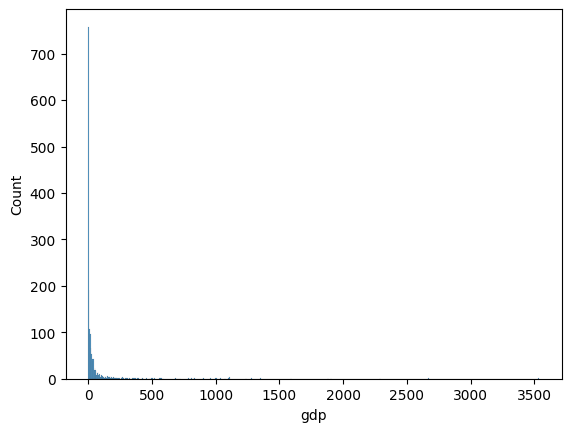

In [ ]:
import seaborn as sns
sns.histplot(df["gdp"])

In [ ]:
a=np.arange(1,100,10).reshape(5,-1)
print(a)
a_df=pd.DataFrame(a)

a_df.columns=["C1" , "C2"]

a_df



[[ 1 11]
 [21 31]
 [41 51]
 [61 71]
 [81 91]]


C1  C2
0   1  11
1  21  31
2  41  51
3  61  71
4  81  91

In [ ]:
import numpy as np
import pandas as pd
arr=np.arange(1,100,10).reshape(2,5)
arr
df2=pd.DataFrame(arr)
df2
#df2.values

0   1   2   3   4
0   1  11  21  31  41
1  51  61  71  81  91

In [ ]:
df.head()

df.index=np.arange(1.0, len(df)+1)
df

country  year  population continent  life_exp     gdp_cap  \
1.0     Afghanistan  1952     8425333      Asia    28.801  779.445314   
2.0     Afghanistan  1957     9240934      Asia    30.332  820.853030   
3.0     Afghanistan  1962    10267083      Asia    31.997  853.100710   
4.0     Afghanistan  1967    11537966      Asia    34.020  836.197138   
5.0     Afghanistan  1972    13079460      Asia    36.088  739.981106   
...             ...   ...         ...       ...       ...         ...   
1700.0     Zimbabwe  1987     9216418    Africa    62.351  706.157306   
1701.0     Zimbabwe  1992    10704340    Africa    60.377  693.420786   
1702.0     Zimbabwe  1997    11404948    Africa    46.809  792.449960   
1703.0     Zimbabwe  2002    11926563    Africa    39.989  672.038623   
1704.0     Zimbabwe  2007    12311143    Africa    43.487  469.709298   

              gdp  
1.0     27.446338  
2.0     23.627358  
3.0     20.328078  
4.0     18.362488  
5.0     18.301393  
...           ...  
1700.0  27.703541  
1701.0  24.167632  
1702.0  19.669689  
1703.0  22.307171  
1704.0  31.305135  

[1704 rows x 7 columns]

In [ ]:
a_df.index=np.arange(1,6)

##indexing and slicing : rows , dataframes

In [ ]:
##iloc implicit index
##loc explicit index
df.loc[1:3]

country  year  population continent  life_exp     gdp_cap        gdp
1.0  Afghanistan  1952     8425333      Asia    28.801  779.445314  27.446338
2.0  Afghanistan  1957     9240934      Asia    30.332  820.853030  23.627358
3.0  Afghanistan  1962    10267083      Asia    31.997  853.100710  20.328078

In [ ]:
df.iloc[1:3]

country  year  population continent  life_exp    gdp_cap        gdp
2.0  Afghanistan  1957     9240934      Asia    30.332  820.85303  23.627358
3.0  Afghanistan  1962    10267083      Asia    31.997  853.10071  20.328078

In [ ]:
df[["country" , "year"]]

country  year
1.0     Afghanistan  1952
2.0     Afghanistan  1957
3.0     Afghanistan  1962
4.0     Afghanistan  1967
5.0     Afghanistan  1972
...             ...   ...
1700.0     Zimbabwe  1987
1701.0     Zimbabwe  1992
1702.0     Zimbabwe  1997
1703.0     Zimbabwe  2002
1704.0     Zimbabwe  2007

[1704 rows x 2 columns]

In [ ]:
df.iloc[[1,100,120]]

country  year  population continent  life_exp      gdp_cap  \
2.0    Afghanistan  1957     9240934      Asia    30.332   820.853030   
101.0   Bangladesh  1972    70759295      Asia    45.252   630.233627   
121.0        Benin  1952     1738315    Africa    38.223  1062.752200   

              gdp  
2.0     23.627358  
101.0    3.189035  
121.0  100.120360

In [ ]:
df.loc[[1,100,120]]

country  year  population continent  life_exp       gdp_cap  \
1.0    Afghanistan  1952     8425333      Asia    28.801    779.445314   
100.0   Bangladesh  1967    62821884      Asia    43.453    721.186086   
120.0      Belgium  2007    10392226    Europe    79.441  33692.605080   

             gdp  
1.0    27.446338  
100.0   3.123261  
120.0   0.466474

In [ ]:
df.set_index("year").reset_index()

year      country  population continent  life_exp     gdp_cap        gdp
0     1952  Afghanistan     8425333      Asia    28.801  779.445314  27.446338
1     1957  Afghanistan     9240934      Asia    30.332  820.853030  23.627358
2     1962  Afghanistan    10267083      Asia    31.997  853.100710  20.328078
3     1967  Afghanistan    11537966      Asia    34.020  836.197138  18.362488
4     1972  Afghanistan    13079460      Asia    36.088  739.981106  18.301393
...    ...          ...         ...       ...       ...         ...        ...
1699  1987     Zimbabwe     9216418    Africa    62.351  706.157306  27.703541
1700  1992     Zimbabwe    10704340    Africa    60.377  693.420786  24.167632
1701  1997     Zimbabwe    11404948    Africa    46.809  792.449960  19.669689
1702  2002     Zimbabwe    11926563    Africa    39.989  672.038623  22.307171
1703  2007     Zimbabwe    12311143    Africa    43.487  469.709298  31.305135

[1704 rows x 7 columns]

In [ ]:

df

country  population continent  life_exp     gdp_cap
year                                                         
1952  Afghanistan     8425333      Asia    28.801  779.445314
1957  Afghanistan     9240934      Asia    30.332  820.853030
1962  Afghanistan    10267083      Asia    31.997  853.100710
1967  Afghanistan    11537966      Asia    34.020  836.197138
1972  Afghanistan    13079460      Asia    36.088  739.981106
...           ...         ...       ...       ...         ...
1987     Zimbabwe     9216418    Africa    62.351  706.157306
1992     Zimbabwe    10704340    Africa    60.377  693.420786
1997     Zimbabwe    11404948    Africa    46.809  792.449960
2002     Zimbabwe    11926563    Africa    39.989  672.038623
2007     Zimbabwe    12311143    Africa    43.487  469.709298

[1704 rows x 5 columns]

In [ ]:
df.reset_index(drop=True , inplace =True)
df

country  population continent  life_exp     gdp_cap
0     Afghanistan     8425333      Asia    28.801  779.445314
1     Afghanistan     9240934      Asia    30.332  820.853030
2     Afghanistan    10267083      Asia    31.997  853.100710
3     Afghanistan    11537966      Asia    34.020  836.197138
4     Afghanistan    13079460      Asia    36.088  739.981106
...           ...         ...       ...       ...         ...
1699     Zimbabwe     9216418    Africa    62.351  706.157306
1700     Zimbabwe    10704340    Africa    60.377  693.420786
1701     Zimbabwe    11404948    Africa    46.809  792.449960
1702     Zimbabwe    11926563    Africa    39.989  672.038623
1703     Zimbabwe    12311143    Africa    43.487  469.709298

[1704 rows x 5 columns]

In [ ]:
data=pd.read_csv("mckinsey.csv")
data.head()

country  year  population continent  life_exp     gdp_cap
0  Afghanistan  1952     8425333      Asia    28.801  779.445314
1  Afghanistan  1957     9240934      Asia    30.332  820.853030
2  Afghanistan  1962    10267083      Asia    31.997  853.100710
3  Afghanistan  1967    11537966      Asia    34.020  836.197138
4  Afghanistan  1972    13079460      Asia    36.088  739.981106

In [ ]:
data.shape

(1704, 6)

In [ ]:
data.drop_duplicates(inplace=True)

data.shape

(1704, 6)

In [ ]:
data.head()

country  year  population continent  life_exp     gdp_cap
0  Afghanistan  1952     8425333      Asia    28.801  779.445314
1  Afghanistan  1957     9240934      Asia    30.332  820.853030
2  Afghanistan  1962    10267083      Asia    31.997  853.100710
3  Afghanistan  1967    11537966      Asia    34.020  836.197138
4  Afghanistan  1972    13079460      Asia    36.088  739.981106

In [ ]:
data.loc[0:5, "year":"life_exp"]

year  population continent  life_exp
0  1952     8425333      Asia    28.801
1  1957     9240934      Asia    30.332
2  1962    10267083      Asia    31.997
3  1967    11537966      Asia    34.020
4  1972    13079460      Asia    36.088
5  1977    14880372      Asia    38.438

In [ ]:
data.loc[0:5, ["year", "population" , "continent"]]

year  population continent
0  1952     8425333      Asia
1  1957     9240934      Asia
2  1962    10267083      Asia
3  1967    11537966      Asia
4  1972    13079460      Asia
5  1977    14880372      Asia

In [ ]:
data.iloc[1:10 , 3:]

continent  life_exp     gdp_cap
1      Asia    30.332  820.853030
2      Asia    31.997  853.100710
3      Asia    34.020  836.197138
4      Asia    36.088  739.981106
5      Asia    38.438  786.113360
6      Asia    39.854  978.011439
7      Asia    40.822  852.395945
8      Asia    41.674  649.341395
9      Asia    41.763  635.341351

In [ ]:
data.sort_values("population")

country  year  population continent  life_exp      gdp_cap
1296  Sao Tome and Principe  1952       60011    Africa    46.471   879.583586
1297  Sao Tome and Principe  1957       61325    Africa    48.945   860.736903
420                Djibouti  1952       63149    Africa    34.812  2669.529475
1298  Sao Tome and Principe  1962       65345    Africa    51.893  1071.551119
1299  Sao Tome and Principe  1967       70787    Africa    54.425  1384.840593
...                     ...   ...         ...       ...       ...          ...
707                   India  2007  1110396331      Asia    64.698  2452.210407
296                   China  1992  1164970000      Asia    68.690  1655.784158
297                   China  1997  1230075000      Asia    70.426  2289.234136
298                   China  2002  1280400000      Asia    72.028  3119.280896
299                   China  2007  1318683096      Asia    72.961  4959.114854

[1704 rows x 6 columns]

In [ ]:
data.sort_values("population" , ascending =False)

country  year  population continent  life_exp      gdp_cap
299                   China  2007  1318683096      Asia    72.961  4959.114854
298                   China  2002  1280400000      Asia    72.028  3119.280896
297                   China  1997  1230075000      Asia    70.426  2289.234136
296                   China  1992  1164970000      Asia    68.690  1655.784158
707                   India  2007  1110396331      Asia    64.698  2452.210407
...                     ...   ...         ...       ...       ...          ...
1299  Sao Tome and Principe  1967       70787    Africa    54.425  1384.840593
1298  Sao Tome and Principe  1962       65345    Africa    51.893  1071.551119
420                Djibouti  1952       63149    Africa    34.812  2669.529475
1297  Sao Tome and Principe  1957       61325    Africa    48.945   860.736903
1296  Sao Tome and Principe  1952       60011    Africa    46.471   879.583586

[1704 rows x 6 columns]

In [ ]:
data.loc[1:1000:100 , ["continent" , "life_exp"]]

continent  life_exp
1        Asia    30.332
101      Asia    46.923
201    Africa    50.324
301  Americas    55.118
401    Europe    70.710
501    Africa    53.378
601  Americas    44.142
701      Asia    54.208
801      Asia    80.690
901    Africa    45.289

In [ ]:
data.set_index("country").reset_index()

country  year  population continent  life_exp     gdp_cap
0     Afghanistan  1952     8425333      Asia    28.801  779.445314
1     Afghanistan  1957     9240934      Asia    30.332  820.853030
2     Afghanistan  1962    10267083      Asia    31.997  853.100710
3     Afghanistan  1967    11537966      Asia    34.020  836.197138
4     Afghanistan  1972    13079460      Asia    36.088  739.981106
...           ...   ...         ...       ...       ...         ...
1699     Zimbabwe  1987     9216418    Africa    62.351  706.157306
1700     Zimbabwe  1992    10704340    Africa    60.377  693.420786
1701     Zimbabwe  1997    11404948    Africa    46.809  792.449960
1702     Zimbabwe  2002    11926563    Africa    39.989  672.038623
1703     Zimbabwe  2007    12311143    Africa    43.487  469.709298

[1704 rows x 6 columns]

https://www.google.com/url?q=https%3A%2F%2Fairlock-on-edge.woolf.university%2F%3Furl%3Dhttps%253A%252F%252Fscaler-production-new.s3.ap-southeast-1.amazonaws.com%252Fattachments%252Fattachments%252F000%252F029%252F471%252Foriginal%252FPandas3_IMDBInsights.ipynb___Colaboratory.pdf%253FX-Amz-Algorithm%253DAWS4-HMAC-SHA256%2526X-Amz-Credential%253DAKIAIDNNIRGHAQUQRWYA%25252F20240714%25252Fap-southeast-1%25252Fs3%25252Faws4_request%2526X-Amz-Date%253D20240714T114316Z%2526X-Amz-Expires%253D561600%2526X-Amz-SignedHeaders%253Dhost%2526X-Amz-Signature%253Dad7d7b1c7072c4ef2b4d17e26d86d284fd54351e5535adb54427c3c1b4b8531b%26resourceId%3Dc1e119e6-0184-4c54-b903-8e57151230d3%26studentId%3D2d856468-c511-41d6-8e2b-e11a659e4af2%26token%3DeyJhbGciOiJIUzI1NiJ9.eyJpZCI6IjJkODU2NDY4LWM1MTEtNDFkNi04ZTJiLWUxMWE2NTllNGFmMiIsImlzcyI6InVybjpXb29sZlVuaXZlcnNpdHk6c2VydmVyL3NlcnZpY2UvYWNjZXNzIiwiaXNWZXJpZmllZCI6dHJ1ZSwia2luZCI6Im9hdXRoIiwib3JnIjp7Imdyb3VwcyI6W10sImlkIjoiOWIxN2Y1Y2UtMTA3OC00ZmRmLWFlYzAtMDJiZjRlY2ZiMGE2In0sInNjb3BlIjoiKiJ9.J8V26ZjTOjuIGa5V3FHTEch9KIlrIiS_hl6DiUNkD4M

In [ ]:
users = pd.DataFrame({"userid":[1, 2, 3], "name":["sharadh", "shahid", "khusalli"]})
users

userid      name
0       1   sharadh
1       2    shahid
2       3  khusalli

In [ ]:
msgs = pd.DataFrame({"userid":[1, 1, 2, 4], "msg":['hmm', "acha", "theek hai", "nice"]})
msgs

userid        msg
0       1        hmm
1       1       acha
2       2  theek hai
3       4       nice

In [ ]:
users.merge(msgs , on ="userid" , how="inner")

userid     name        msg
0       1  sharadh        hmm
1       1  sharadh       acha
2       2   shahid  theek hai

In [ ]:
users.merge(msgs , on ="userid" , how="outer")

userid      name        msg
0       1   sharadh        hmm
1       1   sharadh       acha
2       2    shahid  theek hai
3       3  khusalli        NaN
4       4       NaN       nice

In [ ]:
users.rename(columns={"userid":"id"},inplace=True)

In [ ]:
users.merge(msgs , left_on ="id" , right_on ="userid" , how="outer")

id      name  userid        msg
0  1.0   sharadh     1.0        hmm
1  1.0   sharadh     1.0       acha
2  2.0    shahid     2.0  theek hai
3  3.0  khusalli     NaN        NaN
4  NaN       NaN     4.0       nice

In [ ]:
!gdown https://www.google.com/url?q=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd%2Fview%3Fusp%3Dsharing

Downloading...
From: https://www.google.com/url?q=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd%2Fview%3Fusp%3Dsharing
To: /content/url?q=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd%2Fview%3Fusp%3Dsharing
48.8kB [00:00, 56.3MB/s]


In [ ]:
!gdown 1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd


Downloading...
From: https://drive.google.com/uc?id=1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
To: /content/movies.csv
100% 112k/112k [00:00<00:00, 4.03MB/s]


In [ ]:
!gdown 1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm

Downloading...
From: https://drive.google.com/uc?id=1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm
To: /content/directors.csv
100% 65.4k/65.4k [00:00<00:00, 3.70MB/s]


In [ ]:
movies= pd.read_csv("movies.csv")
directors=pd.read_csv("directors.csv")

In [ ]:
movies.head()

Unnamed: 0     id     budget  popularity     revenue  \
0           0  43597  237000000         150  2787965087   
1           1  43598  300000000         139   961000000   
2           2  43599  245000000         107   880674609   
3           3  43600  250000000         112  1084939099   
4           5  43602  258000000         115   890871626   

                                      title  vote_average  vote_count  \
0                                    Avatar           7.2       11800   
1  Pirates of the Caribbean: At World's End           6.9        4500   
2                                   Spectre           6.3        4466   
3                     The Dark Knight Rises           7.6        9106   
4                              Spider-Man 3           5.9        3576   

   director_id  year month       day  
0         4762  2009   Dec  Thursday  
1         4763  2007   May  Saturday  
2         4764  2015   Oct    Monday  
3         4765  2012   Jul    Monday  
4         4767  2007   May   Tuesday

In [ ]:
directors.head()

Unnamed: 0      director_name    id gender
0           0      James Cameron  4762   Male
1           1     Gore Verbinski  4763   Male
2           2         Sam Mendes  4764   Male
3           3  Christopher Nolan  4765   Male
4           4     Andrew Stanton  4766   Male

In [ ]:
movies.columns

Index(['Unnamed: 0', 'id', 'budget', 'popularity', 'revenue', 'title',
       'vote_average', 'vote_count', 'director_id', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
movies.drop("Unnamed: 0" , axis=1 , inplace=True)
directors.drop("Unnamed: 0" , axis=1 , inplace=True)

In [ ]:
movies.info() , directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1465 non-null   int64  
 1   budget        1465 non-null   int64  
 2   popularity    1465 non-null   int64  
 3   revenue       1465 non-null   int64  
 4   title         1465 non-null   object 
 5   vote_average  1465 non-null   float64
 6   vote_count    1465 non-null   int64  
 7   director_id   1465 non-null   int64  
 8   year          1465 non-null   int64  
 9   month         1465 non-null   object 
 10  day           1465 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 126.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   director_name  2349 non-null   object
 1   id             2349 non-null  

(None, None)

In [ ]:
movies["budget"]=movies["budget"]/1000000

In [ ]:
movies["revenue"]=movies["revenue"]/1000000

In [ ]:
movies.head()

id  budget  popularity      revenue  \
0  43597   237.0         150  2787.965087   
1  43598   300.0         139   961.000000   
2  43599   245.0         107   880.674609   
3  43600   250.0         112  1084.939099   
4  43602   258.0         115   890.871626   

                                      title  vote_average  vote_count  \
0                                    Avatar           7.2       11800   
1  Pirates of the Caribbean: At World's End           6.9        4500   
2                                   Spectre           6.3        4466   
3                     The Dark Knight Rises           7.6        9106   
4                              Spider-Man 3           5.9        3576   

   director_id  year month       day  
0         4762  2009   Dec  Thursday  
1         4763  2007   May  Saturday  
2         4764  2015   Oct    Monday  
3         4765  2012   Jul    Monday  
4         4767  2007   May   Tuesday

In [ ]:
movies.shape , directors.shape

((1465, 10), (2349, 3))

In [ ]:
movies.drop("id" , axis=1 , inplace=True)

In [ ]:
com=movies.merge(directors , left_on="director_id" , right_on="id" , how ="inner")

In [ ]:
movies["director_id"].nunique()

199

In [ ]:
directors["id"].nunique()

2349

In [ ]:
com["id"].nunique()

199

In [ ]:
com["director_id"].nunique()

199

In [ ]:
com.shape

(1465, 13)

In [ ]:
len(com["director_id"].unique())


199

In [ ]:
movies[movies["director_id"].isin(directors["id"])]

budget  popularity      revenue  \
0     237.000         150  2787.965087   
1     300.000         139   961.000000   
2     245.000         107   880.674609   
3     250.000         112  1084.939099   
4     258.000         115   890.871626   
...       ...         ...          ...   
1460    0.000           3     0.321952   
1461    0.027          19     3.151130   
1462    0.000           7     0.000000   
1463    0.000           3     0.000000   
1464    0.220          14     2.040920   

                                         title  vote_average  vote_count  \
0                                       Avatar           7.2       11800   
1     Pirates of the Caribbean: At World's End           6.9        4500   
2                                      Spectre           6.3        4466   
3                        The Dark Knight Rises           7.6        9106   
4                                 Spider-Man 3           5.9        3576   
...                                        ...           ...         ...   
1460                            The Last Waltz           7.9          64   
1461                                    Clerks           7.4         755   
1462                                   Rampage           6.0         131   
1463                                   Slacker           6.4          77   
1464                               El Mariachi           6.6         238   

      director_id  year month       day  
0            4762  2009   Dec  Thursday  
1            4763  2007   May  Saturday  
2            4764  2015   Oct    Monday  
3            4765  2012   Jul    Monday  
4            4767  2007   May   Tuesday  
...           ...   ...   ...       ...  
1460         4809  1978   May    Monday  
1461         5369  1994   Sep   Tuesday  
1462         5148  2009   Aug    Friday  
1463         5535  1990   Jul    Friday  
1464         5097  1992   Sep    Friday  

[1465 rows x 10 columns]

In [ ]:
a,b=np.unique(movies["director_id"] , return_counts=True)

In [ ]:
np.sum(b)

np.int64(1465)

how to check if all values are there inside

In [ ]:
np.all(movies["director_id"].isin(directors["id"]))

np.True_

In [ ]:
data=movies.merge(directors , left_on="director_id" , right_on = "id" , how="left")

In [ ]:
data.head()

budget  popularity      revenue                                     title  \
0   237.0         150  2787.965087                                    Avatar   
1   300.0         139   961.000000  Pirates of the Caribbean: At World's End   
2   245.0         107   880.674609                                   Spectre   
3   250.0         112  1084.939099                     The Dark Knight Rises   
4   258.0         115   890.871626                              Spider-Man 3   

   vote_average  vote_count  director_id  year month       day  \
0           7.2       11800         4762  2009   Dec  Thursday   
1           6.9        4500         4763  2007   May  Saturday   
2           6.3        4466         4764  2015   Oct    Monday   
3           7.6        9106         4765  2012   Jul    Monday   
4           5.9        3576         4767  2007   May   Tuesday   

       director_name    id gender  
0      James Cameron  4762   Male  
1     Gore Verbinski  4763   Male  
2         Sam Mendes  4764   Male  
3  Christopher Nolan  4765   Male  
4          Sam Raimi  4767   Male

In [ ]:
data.drop(["id" , "director_id"] ,axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   budget         1465 non-null   float64
 1   popularity     1465 non-null   int64  
 2   revenue        1465 non-null   float64
 3   title          1465 non-null   object 
 4   vote_average   1465 non-null   float64
 5   vote_count     1465 non-null   int64  
 6   year           1465 non-null   int64  
 7   month          1465 non-null   object 
 8   day            1465 non-null   object 
 9   director_name  1465 non-null   object 
 10  gender         1341 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 126.0+ KB


In [ ]:
data.describe()

budget   popularity      revenue  vote_average    vote_count  \
count  1465.000000  1465.000000  1465.000000   1465.000000   1465.000000   
mean     48.022947    30.855973   143.253923      6.368191   1146.396587   
std      49.355407    34.845214   206.491787      0.818033   1578.077438   
min       0.000000     0.000000     0.000000      3.000000      1.000000   
25%      14.000000    11.000000    17.380126      5.900000    216.000000   
50%      33.000000    23.000000    75.781642      6.400000    571.000000   
75%      66.000000    41.000000   179.246868      6.900000   1387.000000   
max     380.000000   724.000000  2787.965087      8.300000  13752.000000   

              year  
count  1465.000000  
mean   2002.615017  
std       8.680141  
min    1976.000000  
25%    1998.000000  
50%    2004.000000  
75%    2009.000000  
max    2016.000000

In [ ]:
data["new"]=data["revenue"]-data["budget"]

In [ ]:
data.head()

budget  popularity      revenue                                     title  \
0   237.0         150  2787.965087                                    Avatar   
1   300.0         139   961.000000  Pirates of the Caribbean: At World's End   
2   245.0         107   880.674609                                   Spectre   
3   250.0         112  1084.939099                     The Dark Knight Rises   
4   258.0         115   890.871626                              Spider-Man 3   

   vote_average  vote_count  year month       day      director_name gender  \
0           7.2       11800  2009   Dec  Thursday      James Cameron   Male   
1           6.9        4500  2007   May  Saturday     Gore Verbinski   Male   
2           6.3        4466  2015   Oct    Monday         Sam Mendes   Male   
3           7.6        9106  2012   Jul    Monday  Christopher Nolan   Male   
4           5.9        3576  2007   May   Tuesday          Sam Raimi   Male   

           new  
0  2550.965087  
1   661.000000  
2   635.674609  
3   834.939099  
4   632.871626

In [ ]:
def fun(x):
  return x["revenue"]-x["budget"]


#data["new"]=data[["revenue" , "budget"]].apply(fun , axis=1)
data["new"]=data.apply(fun , axis=1)

In [ ]:
data.head()

budget  popularity      revenue                                     title  \
0   237.0         150  2787.965087                                    Avatar   
1   300.0         139   961.000000  Pirates of the Caribbean: At World's End   
2   245.0         107   880.674609                                   Spectre   
3   250.0         112  1084.939099                     The Dark Knight Rises   
4   258.0         115   890.871626                              Spider-Man 3   

   vote_average  vote_count  year month       day      director_name gender  \
0           7.2       11800  2009   Dec  Thursday      James Cameron   Male   
1           6.9        4500  2007   May  Saturday     Gore Verbinski   Male   
2           6.3        4466  2015   Oct    Monday         Sam Mendes   Male   
3           7.6        9106  2012   Jul    Monday  Christopher Nolan   Male   
4           5.9        3576  2007   May   Tuesday          Sam Raimi   Male   

           new  
0  2550.965087  
1   661.000000  
2   635.674609  
3   834.939099  
4   632.871626

In [ ]:
dir=data.groupby("director_name")["budget"].aggregate(["mean","max"]).reset_index()
dir

director_name        mean    max
0                     Adam McKay   56.916667  100.0
1                  Adam Shankman   48.375000   80.0
2    Alejandro González Iñárritu   33.333333  135.0
3                    Alex Proyas   70.400000  140.0
4                Alexander Payne   15.600000   30.0
..                           ...         ...    ...
194                   Wes Craven   23.380000   40.0
195            Wolfgang Petersen   90.142857  175.0
196                  Woody Allen   11.777778   30.0
197                  Zack Snyder  122.857143  250.0
198                  Zhang Yimou   20.833352   94.0

[199 rows x 3 columns]

In [ ]:
dir.sort_values("mean", ascending=False)

director_name        mean    max
62        Gore Verbinski  158.142857  300.0
25          Bryan Singer  144.875000  270.0
142        Peter Jackson  143.666667  250.0
153         Rob Marshall  128.000000  380.0
30     Christopher Nolan  125.625000  250.0
..                   ...         ...    ...
36   Darren Lynn Bousman    4.800000   10.0
190          Tyler Perry    4.555556   20.0
121       Michael Polish    4.200000   13.0
69           James Ivory    4.071429   14.0
131    Nicole Holofcener    1.950000    6.5

[199 rows x 3 columns]

In [ ]:
dir=data.groupby("director_name")["vote_average"].aggregate(["mean","max"]).reset_index()

dir

director_name      mean  max
0                     Adam McKay  6.466667  7.3
1                  Adam Shankman  6.037500  7.5
2    Alejandro González Iñárritu  7.233333  7.6
3                    Alex Proyas  6.480000  7.3
4                Alexander Payne  6.880000  7.4
..                           ...       ...  ...
194                   Wes Craven  5.950000  7.2
195            Wolfgang Petersen  6.571429  7.9
196                  Woody Allen  6.672222  7.8
197                  Zack Snyder  6.485714  7.0
198                  Zhang Yimou  6.616667  7.2

[199 rows x 3 columns]

In [ ]:
data.head()

budget  popularity      revenue                                     title  \
0   237.0         150  2787.965087                                    Avatar   
1   300.0         139   961.000000  Pirates of the Caribbean: At World's End   
2   245.0         107   880.674609                                   Spectre   
3   250.0         112  1084.939099                     The Dark Knight Rises   
4   258.0         115   890.871626                              Spider-Man 3   

   vote_average  vote_count  year month       day      director_name gender  \
0           7.2       11800  2009   Dec  Thursday      James Cameron   Male   
1           6.9        4500  2007   May  Saturday     Gore Verbinski   Male   
2           6.3        4466  2015   Oct    Monday         Sam Mendes   Male   
3           7.6        9106  2012   Jul    Monday  Christopher Nolan   Male   
4           5.9        3576  2007   May   Tuesday          Sam Raimi   Male   

           new  
0  2550.965087  
1   661.000000  
2   635.674609  
3   834.939099  
4   632.871626

In [ ]:
data.groupby("month")["budget"].aggregate("mean").reset_index()

month     budget
0    Apr  42.617222
1    Aug  38.820541
2    Dec  51.094819
3    Feb  37.429346
4    Jan  25.636667
5    Jul  64.980197
6    Jun  68.149666
7    Mar  48.346061
8    May  71.499569
9    Nov  62.581726
10   Oct  33.798658
11   Sep  25.073329

In [ ]:
def f(x):
  return x["vote_count"]/x["vote_average"]
data["add"]=data.apply(f , axis=1)


data.head()

budget  popularity      revenue                                     title  \
0   237.0         150  2787.965087                                    Avatar   
1   300.0         139   961.000000  Pirates of the Caribbean: At World's End   
2   245.0         107   880.674609                                   Spectre   
3   250.0         112  1084.939099                     The Dark Knight Rises   
4   258.0         115   890.871626                              Spider-Man 3   

   vote_average  vote_count  year month       day      director_name gender  \
0           7.2       11800  2009   Dec  Thursday      James Cameron   Male   
1           6.9        4500  2007   May  Saturday     Gore Verbinski   Male   
2           6.3        4466  2015   Oct    Monday         Sam Mendes   Male   
3           7.6        9106  2012   Jul    Monday  Christopher Nolan   Male   
4           5.9        3576  2007   May   Tuesday          Sam Raimi   Male   

           new          add  
0  2550.965087  1638.888889  
1   661.000000   652.173913  
2   635.674609   708.888889  
3   834.939099  1198.157895  
4   632.871626   606.101695

In [ ]:
def ff(x):
  return x/10

data["revenue"]=data["revenue"].apply(ff)

In [ ]:
data.head()

budget  popularity     revenue                                     title  \
0   237.0         150  278.796509                                    Avatar   
1   300.0         139   96.100000  Pirates of the Caribbean: At World's End   
2   245.0         107   88.067461                                   Spectre   
3   250.0         112  108.493910                     The Dark Knight Rises   
4   258.0         115   89.087163                              Spider-Man 3   

   vote_average  vote_count  year month       day      director_name gender  \
0           7.2       11800  2009   Dec  Thursday      James Cameron   Male   
1           6.9        4500  2007   May  Saturday     Gore Verbinski   Male   
2           6.3        4466  2015   Oct    Monday         Sam Mendes   Male   
3           7.6        9106  2012   Jul    Monday  Christopher Nolan   Male   
4           5.9        3576  2007   May   Tuesday          Sam Raimi   Male   

           new          add  
0  2550.965087  1638.888889  
1   661.000000   652.173913  
2   635.674609   708.888889  
3   834.939099  1198.157895  
4   632.871626   606.101695

# **Group based Filtering**

In [ ]:
data.groupby("director_name").filter(lambda x : x["budget"].max()>100)

budget  popularity     revenue  \
0     237.00         150  278.796509   
1     300.00         139   96.100000   
2     245.00         107   88.067461   
3     250.00         112  108.493910   
4     258.00         115   89.087163   
...      ...         ...         ...   
1450    0.40          33   10.000000   
1451    0.20          13    0.450592   
1452    0.00           5    0.261155   
1458    0.06          27    0.322115   
1460    0.00           3    0.032195   

                                         title  vote_average  vote_count  \
0                                       Avatar           7.2       11800   
1     Pirates of the Caribbean: At World's End           6.9        4500   
2                                      Spectre           6.3        4466   
3                        The Dark Knight Rises           7.6        9106   
4                                 Spider-Man 3           5.9        3576   
...                                        ...           ...         ...   
1450                                   Mad Max           6.6        1213   
1451                                  Swingers           6.8         253   
1452                                     Three           6.3          31   
1458                                        Pi           7.1         586   
1460                            The Last Waltz           7.9          64   

      year month       day      director_name gender          new          add  
0     2009   Dec  Thursday      James Cameron   Male  2550.965087  1638.888889  
1     2007   May  Saturday     Gore Verbinski   Male   661.000000   652.173913  
2     2015   Oct    Monday         Sam Mendes   Male   635.674609   708.888889  
3     2012   Jul    Monday  Christopher Nolan   Male   834.939099  1198.157895  
4     2007   May   Tuesday          Sam Raimi   Male   632.871626   606.101695  
...    ...   ...       ...                ...    ...          ...          ...  
1450  1979   Apr  Thursday      George Miller   Male    99.600000   183.787879  
1451  1996   Oct    Friday         Doug Liman   Male     4.305922    37.205882  
1452  2010   Dec  Thursday         Tom Tykwer   Male     2.611555     4.920635  
1458  1998   Jul    Friday   Darren Aronofsky   Male     3.161152    82.535211  
1460  1978   May    Monday    Martin Scorsese   Male     0.321952     8.101266  

[636 rows x 13 columns]

filter year > 2000 and also per director

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   budget         1465 non-null   float64
 1   popularity     1465 non-null   int64  
 2   revenue        1465 non-null   float64
 3   title          1465 non-null   object 
 4   vote_average   1465 non-null   float64
 5   vote_count     1465 non-null   int64  
 6   year           1465 non-null   int64  
 7   month          1465 non-null   object 
 8   day            1465 non-null   object 
 9   director_name  1465 non-null   object 
 10  gender         1341 non-null   object 
 11  new            1465 non-null   float64
 12  add            1465 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 148.9+ KB


In [ ]:
def year_func(x):
  return x["year"].mean()<2000
data.groupby("director_name").filter(year_func)

budget  popularity     revenue                title  vote_average  \
0     237.00         150  278.796509               Avatar           7.2   
4     258.00         115   89.087163         Spider-Man 3           5.9   
13    225.00          52   62.402678       Men in Black 3           6.2   
19    200.00         100  184.503419              Titanic           7.5   
22    200.00          35   78.376634         Spider-Man 2           6.7   
...      ...         ...         ...                  ...           ...   
1443    0.35          35    2.940000        The Evil Dead           7.3   
1450    0.40          33   10.000000              Mad Max           6.6   
1453    0.00           6    0.000000  She's Gotta Have It           6.1   
1456    0.01          20    0.700000           Eraserhead           7.5   
1460    0.00           3    0.032195       The Last Waltz           7.9   

      vote_count  year month        day     director_name gender          new  \
0          11800  2009   Dec   Thursday     James Cameron   Male  2550.965087   
4           3576  2007   May    Tuesday         Sam Raimi   Male   632.871626   
13          4160  2012   May  Wednesday  Barry Sonnenfeld   Male   399.026776   
19          7562  1997   Nov    Tuesday     James Cameron   Male  1645.034188   
22          4321  2004   Jun     Friday         Sam Raimi   Male   583.766341   
...          ...   ...   ...        ...               ...    ...          ...   
1443         894  1981   Oct   Thursday         Sam Raimi   Male    29.050000   
1450        1213  1979   Apr   Thursday     George Miller   Male    99.600000   
1453          25  1986   Aug     Friday         Spike Lee   Male     0.000000   
1456         485  1977   Mar   Saturday       David Lynch   Male     6.990000   
1460          64  1978   May     Monday   Martin Scorsese   Male     0.321952   

              add  
0     1638.888889  
4      606.101695  
13     670.967742  
19    1008.266667  
22     644.925373  
...           ...  
1443   122.465753  
1450   183.787879  
1453     4.098361  
1456    64.666667  
1460     8.101266  

[428 rows x 13 columns]

# **Apply function**

In [ ]:
data.head()

budget  popularity     revenue                                     title  \
0   237.0         150  278.796509                                    Avatar   
1   300.0         139   96.100000  Pirates of the Caribbean: At World's End   
2   245.0         107   88.067461                                   Spectre   
3   250.0         112  108.493910                     The Dark Knight Rises   
4   258.0         115   89.087163                              Spider-Man 3   

   vote_average  vote_count  year month       day      director_name gender  \
0           7.2       11800  2009   Dec  Thursday      James Cameron   Male   
1           6.9        4500  2007   May  Saturday     Gore Verbinski   Male   
2           6.3        4466  2015   Oct    Monday         Sam Mendes   Male   
3           7.6        9106  2012   Jul    Monday  Christopher Nolan   Male   
4           5.9        3576  2007   May   Tuesday          Sam Raimi   Male   

           new          add  
0  2550.965087  1638.888889  
1   661.000000   652.173913  
2   635.674609   708.888889  
3   834.939099  1198.157895  
4   632.871626   606.101695

In [ ]:
data["budget"]=data["budget"].apply(lambda x : x*10)

In [ ]:
data.head()

budget  popularity     revenue                                     title  \
0  2370.0         150  278.796509                                    Avatar   
1  3000.0         139   96.100000  Pirates of the Caribbean: At World's End   
2  2450.0         107   88.067461                                   Spectre   
3  2500.0         112  108.493910                     The Dark Knight Rises   
4  2580.0         115   89.087163                              Spider-Man 3   

   vote_average  vote_count  year month       day      director_name gender  \
0           7.2       11800  2009   Dec  Thursday      James Cameron   Male   
1           6.9        4500  2007   May  Saturday     Gore Verbinski   Male   
2           6.3        4466  2015   Oct    Monday         Sam Mendes   Male   
3           7.6        9106  2012   Jul    Monday  Christopher Nolan   Male   
4           5.9        3576  2007   May   Tuesday          Sam Raimi   Male   

           new          add  
0  2550.965087  1638.888889  
1   661.000000   652.173913  
2   635.674609   708.888889  
3   834.939099  1198.157895  
4   632.871626   606.101695

In [ ]:
data["budget"]=data["budget"].apply(lambda x : x*10)

In [ ]:
data.groupby("director_name")["budget"].aggregate(["mean", "max" , "min"])

mean      max     min
director_name                                             
Adam McKay                    5691.666667  10000.0  2600.0
Adam Shankman                 4837.500000   8000.0  1100.0
Alejandro González Iñárritu   3333.333333  13500.0     0.0
Alex Proyas                   7040.000000  14000.0  1500.0
Alexander Payne               1560.000000   3000.0     0.0
...                                   ...      ...     ...
Wes Craven                    2338.000000   4000.0   180.0
Wolfgang Petersen             9014.285714  17500.0  1400.0
Woody Allen                   1177.777778   3000.0     0.0
Zack Snyder                  12285.714286  25000.0  2800.0
Zhang Yimou                   2083.335167   9400.0     0.0

[199 rows x 3 columns]

In [ ]:
data.groupby("director_name").filter(lambda x : x["revenue"].max()>100)

budget  popularity     revenue  \
0     23700.0         150  278.796509   
1     30000.0         139   96.100000   
2     24500.0         107   88.067461   
3     25000.0         112  108.493910   
8     20000.0         145  106.565981   
...       ...         ...         ...   
1337    500.0          48    0.000000   
1341    900.0          60    3.972310   
1348    500.0           8    0.304914   
1417    150.0          58    9.700915   
1424    120.0          63   10.391167   

                                           title  vote_average  vote_count  \
0                                         Avatar           7.2       11800   
1       Pirates of the Caribbean: At World's End           6.9        4500   
2                                        Spectre           6.3        4466   
3                          The Dark Knight Rises           7.6        9106   
8     Pirates of the Caribbean: Dead Man's Chest           7.0        5246   
...                                          ...           ...         ...   
1337                        Insidious: Chapter 2           6.5        1211   
1341                                     Memento           8.1        4028   
1348                          Heavenly Creatures           7.0         294   
1417                                   Insidious           6.8        1737   
1424                                         Saw           7.2        2184   

      year month        day      director_name gender          new  \
0     2009   Dec   Thursday      James Cameron   Male  2550.965087   
1     2007   May   Saturday     Gore Verbinski   Male   661.000000   
2     2015   Oct     Monday         Sam Mendes   Male   635.674609   
3     2012   Jul     Monday  Christopher Nolan   Male   834.939099   
8     2006   Jun    Tuesday     Gore Verbinski   Male   865.659812   
...    ...   ...        ...                ...    ...          ...   
1337  2013   Sep   Thursday          James Wan   Male    -5.000000   
1341  2000   Oct  Wednesday  Christopher Nolan   Male    30.723096   
1348  1994   Sep     Friday      Peter Jackson   Male    -1.950865   
1417  2010   Sep     Monday          James Wan   Male    95.509150   
1424  2004   Oct     Friday          James Wan   Male   102.711669   

              add  
0     1638.888889  
1      652.173913  
2      708.888889  
3     1198.157895  
8      749.428571  
...           ...  
1337   186.307692  
1341   497.283951  
1348    42.000000  
1417   255.441176  
1424   303.333333  

[76 rows x 13 columns]

In [ ]:
d=data.groupby("director_name").filter(lambda x : x["revenue"].mean()>8)

In [ ]:
d["director_name"].value_counts()

director_name
Steven Spielberg       26
Martin Scorsese        19
Clint Eastwood         19
Ridley Scott           16
Steven Soderbergh      15
                       ..
Anne Fletcher           5
Nicholas Stoller        5
Jason Reitman           5
Alexander Payne         5
Darren Lynn Bousman     5
Name: count, Length: 125, dtype: int64

In [ ]:
def func(x):
  x["risky"]=x["budget"]-x["revenue"].mean()>0
  return x


data.groupby("director_name").apply(func)

/tmp/ipython-input-3259508336.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data.groupby("director_name").apply(func)


budget  popularity    revenue  \
director_name                                          
Adam McKay    176   10000.000          24  17.043293   
              323    7250.000          12  16.296618   
              366    6500.000          22  12.810764   
              505    5000.000          38  17.364901   
              839    2800.000          57  13.334651   
...                       ...         ...        ...   
Zhang Yimou   590       0.011           9   0.000000   
              604    3100.000          23  17.739443   
              1217      0.000          21   9.286395   
              1223      0.000           1   0.000000   
              1389      0.000           6   0.000000   

                                                          title  vote_average  \
director_name                                                                   
Adam McKay    176                                The Other Guys           6.1   
              323   Talladega Nights: The Ballad of Ricky Bobby           6.2   
              366                                 Step Brothers           6.5   
              505             Anchorman 2: The Legend Continues           6.0   
              839                                 The Big Short           7.3   
...                                                         ...           ...   
Zhang Yimou   590                    Curse of the Golden Flower           6.6   
              604                                          Hero           7.2   
              1217                      House of Flying Daggers           7.1   
              1223             A Woman, a Gun and a Noodle Shop           4.8   
              1389                                  Coming Home           6.9   

                    vote_count  year month        day director_name gender  \
director_name                                                                
Adam McKay    176         1383  2010   Aug     Friday    Adam McKay   Male   
              323          491  2006   Aug     Friday    Adam McKay   Male   
              366         1062  2008   Jul     Friday    Adam McKay   Male   
              505          923  2013   Dec  Wednesday    Adam McKay   Male   
              839         2607  2015   Dec     Friday    Adam McKay   Male   
...                        ...   ...   ...        ...           ...    ...   
Zhang Yimou   590          203  2006   Dec   Thursday   Zhang Yimou   Male   
              604          635  2002   Dec   Thursday   Zhang Yimou   Male   
              1217         439  2004   May  Wednesday   Zhang Yimou   Male   
              1223          13  2009   Dec     Friday   Zhang Yimou   Male   
              1389          49  2014   May     Friday   Zhang Yimou   Male   

                           new         add  risky  
director_name                                      
Adam McKay    176    70.432927  226.721311   True  
              323    90.466177   79.193548   True  
              366    63.107642  163.384615   True  
              505   123.649015  153.833333   True  
              839   105.346506  357.123288   True  
...                        ...         ...    ...  
Zhang Yimou   590    -0.000110   30.757576  False  
              604   146.394432   88.194444   True  
              1217   92.863945   61.830986  False  
              1223    0.000000    2.708333  False  
              1389    0.000000    7.101449  False  

[1465 rows x 14 columns]

In [ ]:

data["mean"]=data.groupby("month")["revenue"].apply(lambda x : x["revenue"].mean())

KeyError: 'revenue'

In [ ]:
def func(x):
  x["risky"]=x["budget"]-x["revenue"].mean()>0
  return x


data.groupby("director_name").apply(func)

/tmp/ipython-input-3259508336.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data.groupby("director_name").apply(func)


budget  popularity    revenue  \
director_name                                          
Adam McKay    176   10000.000          24  17.043293   
              323    7250.000          12  16.296618   
              366    6500.000          22  12.810764   
              505    5000.000          38  17.364901   
              839    2800.000          57  13.334651   
...                       ...         ...        ...   
Zhang Yimou   590       0.011           9   0.000000   
              604    3100.000          23  17.739443   
              1217      0.000          21   9.286395   
              1223      0.000           1   0.000000   
              1389      0.000           6   0.000000   

                                                          title  vote_average  \
director_name                                                                   
Adam McKay    176                                The Other Guys           6.1   
              323   Talladega Nights: The Ballad of Ricky Bobby           6.2   
              366                                 Step Brothers           6.5   
              505             Anchorman 2: The Legend Continues           6.0   
              839                                 The Big Short           7.3   
...                                                         ...           ...   
Zhang Yimou   590                    Curse of the Golden Flower           6.6   
              604                                          Hero           7.2   
              1217                      House of Flying Daggers           7.1   
              1223             A Woman, a Gun and a Noodle Shop           4.8   
              1389                                  Coming Home           6.9   

                    vote_count  year month        day director_name gender  \
director_name                                                                
Adam McKay    176         1383  2010   Aug     Friday    Adam McKay   Male   
              323          491  2006   Aug     Friday    Adam McKay   Male   
              366         1062  2008   Jul     Friday    Adam McKay   Male   
              505          923  2013   Dec  Wednesday    Adam McKay   Male   
              839         2607  2015   Dec     Friday    Adam McKay   Male   
...                        ...   ...   ...        ...           ...    ...   
Zhang Yimou   590          203  2006   Dec   Thursday   Zhang Yimou   Male   
              604          635  2002   Dec   Thursday   Zhang Yimou   Male   
              1217         439  2004   May  Wednesday   Zhang Yimou   Male   
              1223          13  2009   Dec     Friday   Zhang Yimou   Male   
              1389          49  2014   May     Friday   Zhang Yimou   Male   

                           new         add  risky  
director_name                                      
Adam McKay    176    70.432927  226.721311   True  
              323    90.466177   79.193548   True  
              366    63.107642  163.384615   True  
              505   123.649015  153.833333   True  
              839   105.346506  357.123288   True  
...                        ...         ...    ...  
Zhang Yimou   590    -0.000110   30.757576  False  
              604   146.394432   88.194444   True  
              1217   92.863945   61.830986  False  
              1223    0.000000    2.708333  False  
              1389    0.000000    7.101449  False  

[1465 rows x 14 columns]

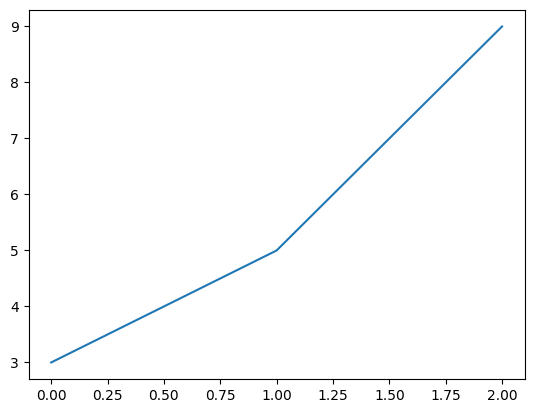

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x=[0,1,2]
y=[3,5,9]
plt.plot(x,y)

In [2]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O final_vg.csv

--2025-09-24 01:50:06--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.225.41.5, 13.225.41.18, 13.225.41.124, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.225.41.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘final_vg.csv’

final_vg.csv        100%[===================>]   1.95M  --.-KB/s    in 0.07s   

2025-09-24 01:50:07 (26.8 MB/s) - ‘final_vg.csv’ saved [2041483/2041483]



In [7]:
import pandas as pd
data=pd.read_csv("final_vg.csv")

data

Rank                                           Name Platform    Year  \
0       2061                                           1942      NES  1985.0   
1       9137                   ¡Shin Chan Flipa en colores!       DS  2007.0   
2      14279              .hack: Sekai no Mukou ni + Versus      PS3  2012.0   
3       8359                     .hack//G.U. Vol.1//Rebirth      PS2  2006.0   
4       7109                   .hack//G.U. Vol.2//Reminisce      PS2  2006.0   
...      ...                                            ...      ...     ...   
16647   7925                             Zumba Fitness Rush     X360  2012.0   
16648   6279                     Zumba Fitness: World Party      Wii  2013.0   
16649   6977                     Zumba Fitness: World Party     XOne  2013.0   
16650  15422                                         Zwei!!      PSP  2008.0   
16651  12919  Zyuden Sentai Kyoryuger: Game de Gaburincho!!      3DS  2013.0   

              Genre              Publisher  NA_Sales  EU_Sales  JP_Sales  \
0           Shooter                 Capcom  4.569217  3.033887  3.439352   
1          Platform              505 Games  2.076955  1.493442  3.033887   
2            Action     Namco Bandai Games  1.145709  1.762339  1.493442   
3      Role-Playing     Namco Bandai Games  2.031986  1.389856  3.228043   
4      Role-Playing     Namco Bandai Games  2.792725  2.592054  1.440483   
...             ...                    ...       ...       ...       ...   
16647        Sports              505 Games  4.409308  3.167419  4.168474   
16648          Misc  Majesco Entertainment  3.033887  2.792725  1.596852   
16649          Misc  Majesco Entertainment  3.228043  2.004268  1.833151   
16650  Role-Playing     Falcom Corporation  1.087977  0.592445  1.087977   
16651        Action     Namco Bandai Games  1.081046  1.714664  2.004268   

       Other_Sales  Global_Sales  
0         1.991671     12.802935  
1         0.394830      7.034163  
2         0.408693      4.982552  
3         0.394830      7.226880  
4         1.493442      8.363113  
...            ...           ...  
16647     1.087977     13.053204  
16648     1.493442      8.878837  
16649     1.087977      7.954274  
16650     0.394830      3.509168  
16651     0.394830      5.132196  

[16652 rows x 11 columns]

In [8]:
cat_counts=data["Genre"].value_counts().reset_index()
cat_counts

Genre  count
0         Action   3316
1         Sports   2400
2           Misc   1739
3   Role-Playing   1488
4        Shooter   1310
5      Adventure   1286
6         Racing   1249
7       Platform    886
8     Simulation    867
9       Fighting    848
10      Strategy    681
11        Puzzle    582

<BarContainer object of 12 artists>

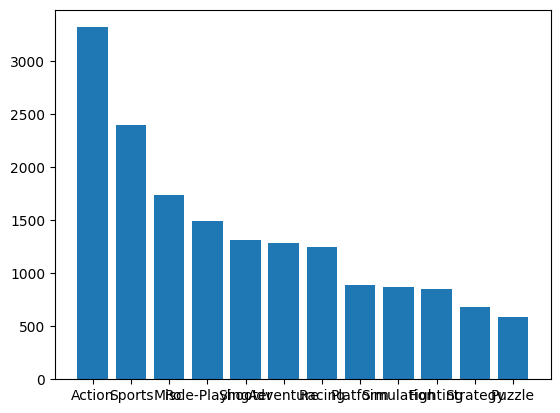

In [9]:
plt.bar(cat_counts["Genre"] , cat_counts["count"])

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data.head()

Rank                               Name Platform    Year         Genre  \
0   2061                               1942      NES  1985.0       Shooter   
1   9137       ¡Shin Chan Flipa en colores!       DS  2007.0      Platform   
2  14279  .hack: Sekai no Mukou ni + Versus      PS3  2012.0        Action   
3   8359         .hack//G.U. Vol.1//Rebirth      PS2  2006.0  Role-Playing   
4   7109       .hack//G.U. Vol.2//Reminisce      PS2  2006.0  Role-Playing   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0              Capcom  4.569217  3.033887  3.439352     1.991671     12.802935  
1           505 Games  2.076955  1.493442  3.033887     0.394830      7.034163  
2  Namco Bandai Games  1.145709  1.762339  1.493442     0.408693      4.982552  
3  Namco Bandai Games  2.031986  1.389856  3.228043     0.394830      7.226880  
4  Namco Bandai Games  2.792725  2.592054  1.440483     1.493442      8.363113

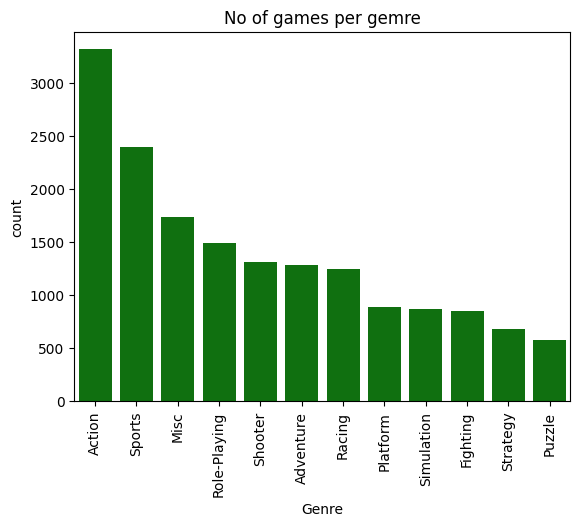

In [13]:
sns.countplot(data=data , x="Genre" , color="green" , order=data["Genre"].value_counts().index)

plt.xticks(rotation=90)
plt.title("No of games per gemre")
plt.show()

<Axes: xlabel='Year', ylabel='Count'>

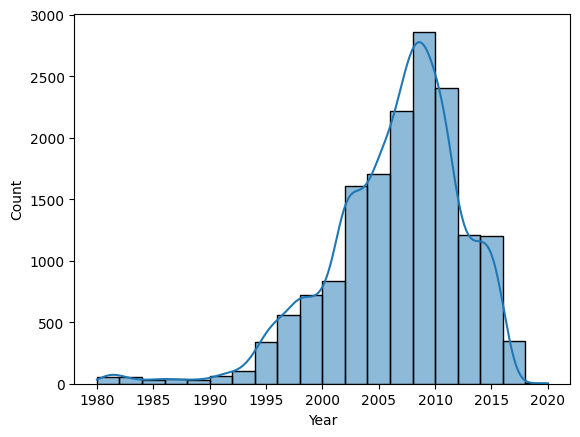

In [14]:
sns.histplot(data["Year"], bins=20 , kde=True)

difference between hist and Kde plot is y axis has probability in kde plot

In [15]:
data.head()

Rank                               Name Platform    Year         Genre  \
0   2061                               1942      NES  1985.0       Shooter   
1   9137       ¡Shin Chan Flipa en colores!       DS  2007.0      Platform   
2  14279  .hack: Sekai no Mukou ni + Versus      PS3  2012.0        Action   
3   8359         .hack//G.U. Vol.1//Rebirth      PS2  2006.0  Role-Playing   
4   7109       .hack//G.U. Vol.2//Reminisce      PS2  2006.0  Role-Playing   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0              Capcom  4.569217  3.033887  3.439352     1.991671     12.802935  
1           505 Games  2.076955  1.493442  3.033887     0.394830      7.034163  
2  Namco Bandai Games  1.145709  1.762339  1.493442     0.408693      4.982552  
3  Namco Bandai Games  2.031986  1.389856  3.228043     0.394830      7.226880  
4  Namco Bandai Games  2.792725  2.592054  1.440483     1.493442      8.363113

<Axes: xlabel='NA_Sales', ylabel='Count'>

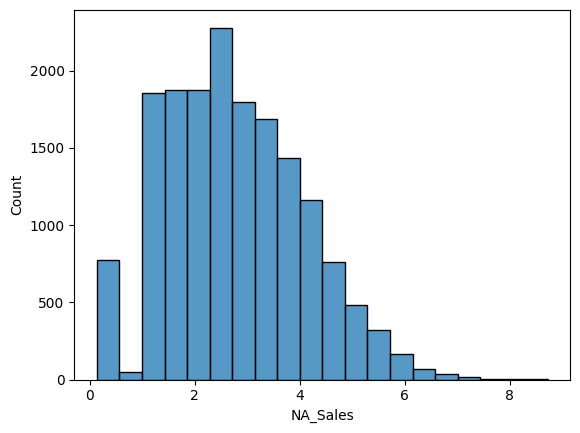

In [16]:
sns.histplot(data["NA_Sales"] , bins=20)

In [17]:
sales_data = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
region_sales = sales_data.sum(axis=0)
region_sales

NA_Sales       45831.525845
EU_Sales       33251.970702
JP_Sales       41624.625635
Other_Sales    19180.256828
dtype: float64

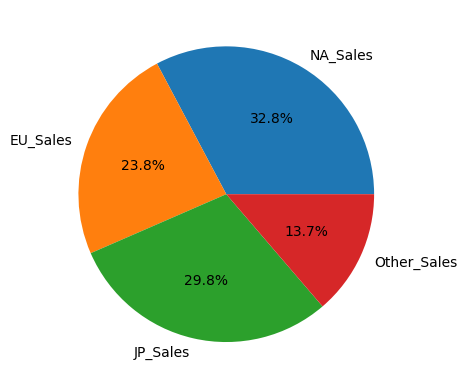

In [18]:
plt.pie(region_sales , labels=region_sales.index , autopct="%1.1f%%")
plt.show()

<Axes: xlabel='Year', ylabel='Count'>

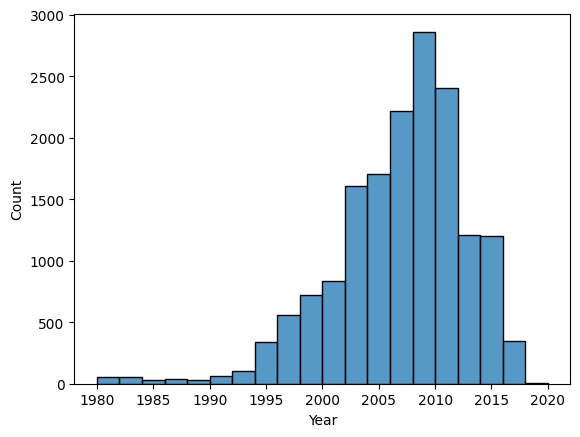

In [19]:
sns.histplot(data=data , x="Year" , bins=20)

Univarianmt analysis bar plot , hist plot , kde , box plot



Bivariant analysis

line plot , scatter ploit

In [20]:
data.head()

Rank                               Name Platform    Year         Genre  \
0   2061                               1942      NES  1985.0       Shooter   
1   9137       ¡Shin Chan Flipa en colores!       DS  2007.0      Platform   
2  14279  .hack: Sekai no Mukou ni + Versus      PS3  2012.0        Action   
3   8359         .hack//G.U. Vol.1//Rebirth      PS2  2006.0  Role-Playing   
4   7109       .hack//G.U. Vol.2//Reminisce      PS2  2006.0  Role-Playing   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0              Capcom  4.569217  3.033887  3.439352     1.991671     12.802935  
1           505 Games  2.076955  1.493442  3.033887     0.394830      7.034163  
2  Namco Bandai Games  1.145709  1.762339  1.493442     0.408693      4.982552  
3  Namco Bandai Games  2.031986  1.389856  3.228043     0.394830      7.226880  
4  Namco Bandai Games  2.792725  2.592054  1.440483     1.493442      8.363113

In [21]:
data["Genre"].value_counts()

Genre
Action          3316
Sports          2400
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

In [22]:
data["Name"].value_counts()

Name
Ice Hockey                             41
Baseball                               17
Need for Speed: Most Wanted            12
Ratatouille                             9
FIFA 14                                 9
                                       ..
Indy Racing 2000                        1
Indycar Series 2005                     1
inFAMOUS                                1
inFAMOUS 2                              1
Inazuma Eleven Strikers 2012 Xtreme     1
Name: count, Length: 11493, dtype: int64

In [23]:
ih=data[data["Name"]=="Ice Hockey"]
Baseball=data[data["Name"]=="Baseball"]
NSP=data[data["Name"]=="Need for Speed: Most Wanted"]
# sns.lineplot(data="ih" , x="Year" , y="NA_Sales")
ih.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 6073 to 6113
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          41 non-null     int64  
 1   Name          41 non-null     object 
 2   Platform      41 non-null     object 
 3   Year          41 non-null     float64
 4   Genre         41 non-null     object 
 5   Publisher     41 non-null     object 
 6   NA_Sales      41 non-null     float64
 7   EU_Sales      41 non-null     float64
 8   JP_Sales      41 non-null     float64
 9   Other_Sales   41 non-null     float64
 10  Global_Sales  41 non-null     float64
dtypes: float64(6), int64(1), object(4)
memory usage: 3.8+ KB


<Axes: xlabel='Year', ylabel='NA_Sales'>

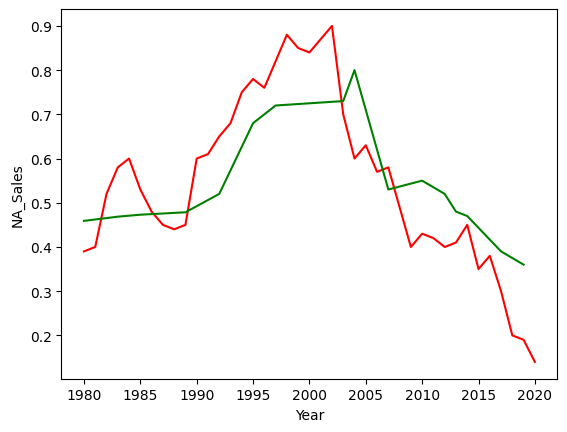

In [24]:
sns.lineplot(data=ih , x="Year" , y="NA_Sales" , color ="red")
sns.lineplot(data=Baseball , x="Year" , y="NA_Sales" , color ="green")



<Axes: xlabel='Genre', ylabel='count'>

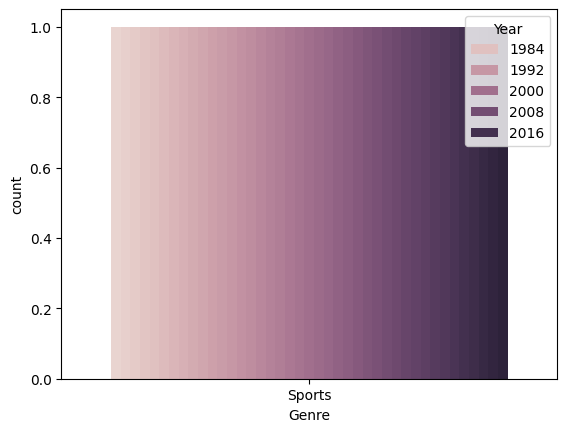

In [25]:
sns.countplot(data=ih , x="Genre" , hue="Year")

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16652 entries, 0 to 16651
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16652 non-null  int64  
 1   Name          16652 non-null  object 
 2   Platform      16652 non-null  object 
 3   Year          16381 non-null  float64
 4   Genre         16652 non-null  object 
 5   Publisher     16594 non-null  object 
 6   NA_Sales      16652 non-null  float64
 7   EU_Sales      16652 non-null  float64
 8   JP_Sales      16652 non-null  float64
 9   Other_Sales   16652 non-null  float64
 10  Global_Sales  16652 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [27]:
numerical_data = data.select_dtypes(include=np.number)
display(numerical_data.head())

Rank    Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0   2061  1985.0  4.569217  3.033887  3.439352     1.991671     12.802935
1   9137  2007.0  2.076955  1.493442  3.033887     0.394830      7.034163
2  14279  2012.0  1.145709  1.762339  1.493442     0.408693      4.982552
3   8359  2006.0  2.031986  1.389856  3.228043     0.394830      7.226880
4   7109  2006.0  2.792725  2.592054  1.440483     1.493442      8.363113

In [28]:
numerical_data.corr()

Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.179515 -0.846227 -0.784596 -0.332589    -0.755057   
Year          0.179515  1.000000 -0.134140 -0.018786 -0.265222     0.049243   
NA_Sales     -0.846227 -0.134140  1.000000  0.728037  0.268733     0.737128   
EU_Sales     -0.784596 -0.018786  0.728037  1.000000  0.155849     0.812978   
JP_Sales     -0.332589 -0.265222  0.268733  0.155849  1.000000     0.014897   
Other_Sales  -0.755057  0.049243  0.737128  0.812978  0.014897     1.000000   
Global_Sales -0.883019 -0.123778  0.892189  0.884294  0.460068     0.829061   

              Global_Sales  
Rank             -0.883019  
Year             -0.123778  
NA_Sales          0.892189  
EU_Sales          0.884294  
JP_Sales          0.460068  
Other_Sales       0.829061  
Global_Sales      1.000000

<Axes: >

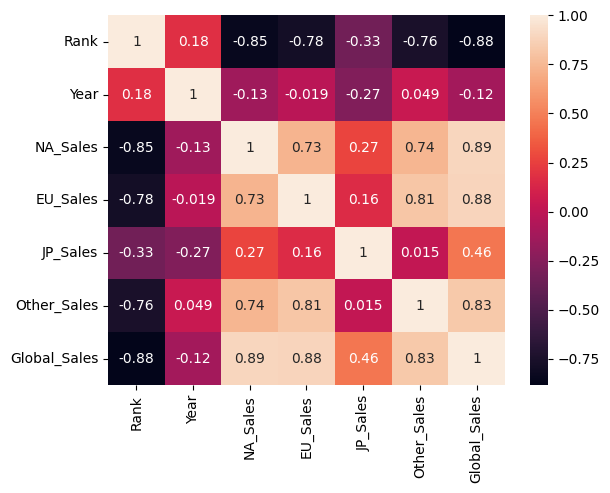

In [29]:
sns.heatmap(numerical_data.corr() , annot=True)

In [7]:
import pandas as pd
cars=pd.read_excel("cars24-car-price.xlsx")

In [8]:
cars.head()

selling_price                                       full_name  year  \
0           1.20                                 Maruti Alto Std  2012   
1           5.50                          Hyundai Grand i10 Asta  2016   
2           2.15                                Hyundai i20 Asta  2010   
3           2.26                   Maruti Alto K10 2010-2014 VXI  2012   
4           5.70  Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV  2015   

  seller_type  km_driven fuel_type transmission_type  mileage  engine  \
0  Individual     120000    Petrol            Manual    19.70   796.0   
1  Individual      20000    Petrol            Manual    18.90  1197.0   
2  Individual      60000    Petrol            Manual    17.00  1197.0   
3  Individual      37000    Petrol            Manual    20.92   998.0   
4      Dealer      30000    Diesel            Manual    22.77  1498.0   

   max_power  seats  
0      46.30      5  
1      82.00      5  
2      80.00      5  
3      67.10      5  
4      98.59      5

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   selling_price      19980 non-null  float64
 1   full_name          19980 non-null  object 
 2   year               19980 non-null  int64  
 3   seller_type        19980 non-null  object 
 4   km_driven          19980 non-null  int64  
 5   fuel_type          19980 non-null  object 
 6   transmission_type  19980 non-null  object 
 7   mileage            19980 non-null  float64
 8   engine             19980 non-null  float64
 9   max_power          19980 non-null  float64
 10  seats              19980 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.7+ MB


###No Null values###

In [10]:
cars.isnull().sum()

selling_price        0
full_name            0
year                 0
seller_type          0
km_driven            0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
dtype: int64

In [11]:
cars.columns

Index(['selling_price', 'full_name', 'year', 'seller_type', 'km_driven',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats'],
      dtype='object')

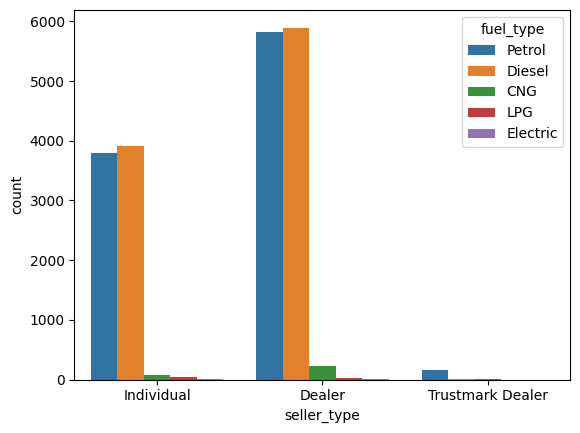

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
cars["seller_type"].value_counts()

sns.countplot(data=cars , x="seller_type" , hue="fuel_type")
plt.show()



Therefore petrol and diesel are the high majority of cars getting sold

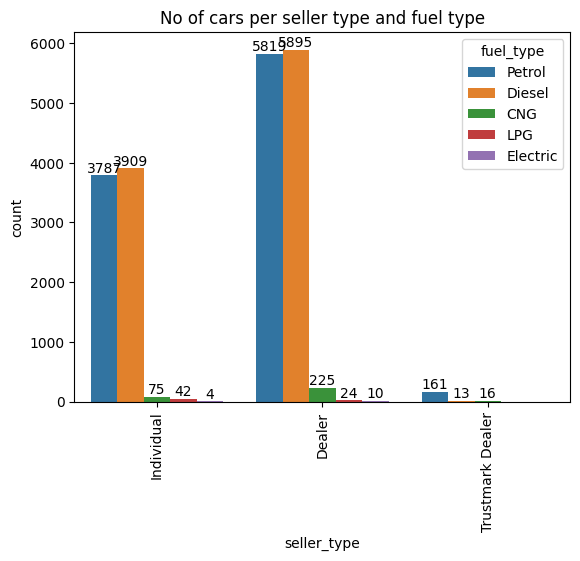

In [13]:
ax = sns.countplot(data=cars , x="seller_type" , hue="fuel_type")

plt.xticks(rotation=90)
plt.title("No of cars per seller type and fuel type")

# Add value labels
for container in ax.containers:
    ax.bar_label(container)

plt.show()

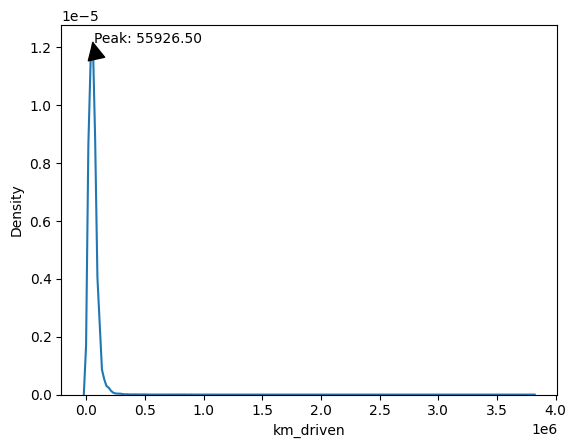

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ax = sns.kdeplot(x="km_driven",data=cars)

# Find the peak of the KDE plot
lines = ax.get_lines()
if lines:
    x_data, y_data = lines[0].get_data()
    peak_y = y_data.max()
    peak_x = x_data[np.argmax(y_data)]

    # Annotate the peak
    ax.annotate(f'Peak: {peak_x:.2f}', xy=(peak_x, peak_y), xytext=(peak_x + peak_x*0.1, peak_y),
                arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

data seems to be left skewed with peak of the number of km around 5000km

In [15]:
cars.head()

selling_price                                       full_name  year  \
0           1.20                                 Maruti Alto Std  2012   
1           5.50                          Hyundai Grand i10 Asta  2016   
2           2.15                                Hyundai i20 Asta  2010   
3           2.26                   Maruti Alto K10 2010-2014 VXI  2012   
4           5.70  Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV  2015   

  seller_type  km_driven fuel_type transmission_type  mileage  engine  \
0  Individual     120000    Petrol            Manual    19.70   796.0   
1  Individual      20000    Petrol            Manual    18.90  1197.0   
2  Individual      60000    Petrol            Manual    17.00  1197.0   
3  Individual      37000    Petrol            Manual    20.92   998.0   
4      Dealer      30000    Diesel            Manual    22.77  1498.0   

   max_power  seats  
0      46.30      5  
1      82.00      5  
2      80.00      5  
3      67.10      5  
4      98.59      5

In [16]:
year_counts = cars["year"].value_counts().reset_index()
year_counts.columns = ["year", "count"]
year_counts["percentage"] = (year_counts["count"] / year_counts["count"].sum()) * 100
display(year_counts)

year  count  percentage
0   2017   2653   13.278278
1   2016   2587   12.947948
2   2015   2430   12.162162
3   2018   2163   10.825826
4   2014   1947    9.744745
5   2013   1776    8.888889
6   2012   1554    7.777778
7   2019   1238    6.196196
8   2011   1097    5.490490
9   2010    846    4.234234
10  2009    444    2.222222
11  2008    374    1.871872
12  2007    247    1.236236
13  2020    240    1.201201
14  2006    180    0.900901
15  2005     65    0.325325
16  2004     44    0.220220
17  2003     23    0.115115
18  2002     16    0.080080
19  2001     15    0.075075
20  2000     13    0.065065
21  1999     12    0.060060
22  1998      6    0.030030
23  2021      6    0.030030
24  1992      1    0.005005
25  1997      1    0.005005
26  1991      1    0.005005
27  1996      1    0.005005

In [17]:
cars.shape

(19980, 11)

In [18]:
cars_filt=cars.groupby("year").filter(lambda x : x["year"].count()>170)

In [19]:
cars_filt.head()

selling_price                                       full_name  year  \
0           1.20                                 Maruti Alto Std  2012   
1           5.50                          Hyundai Grand i10 Asta  2016   
2           2.15                                Hyundai i20 Asta  2010   
3           2.26                   Maruti Alto K10 2010-2014 VXI  2012   
4           5.70  Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV  2015   

  seller_type  km_driven fuel_type transmission_type  mileage  engine  \
0  Individual     120000    Petrol            Manual    19.70   796.0   
1  Individual      20000    Petrol            Manual    18.90  1197.0   
2  Individual      60000    Petrol            Manual    17.00  1197.0   
3  Individual      37000    Petrol            Manual    20.92   998.0   
4      Dealer      30000    Diesel            Manual    22.77  1498.0   

   max_power  seats  
0      46.30      5  
1      82.00      5  
2      80.00      5  
3      67.10      5  
4      98.59      5

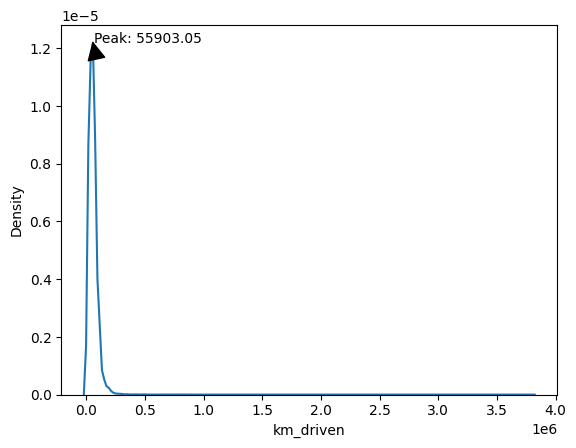

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ax = sns.kdeplot(x="km_driven",data=cars_filt)

# Find the peak of the KDE plot
lines = ax.get_lines()
if lines:
    x_data, y_data = lines[0].get_data()
    peak_y = y_data.max()
    peak_x = x_data[np.argmax(y_data)]

    # Annotate the peak
    ax.annotate(f'Peak: {peak_x:.2f}', xy=(peak_x, peak_y), xytext=(peak_x + peak_x*0.1, peak_y),
                arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

<Axes: xlabel='mileage', ylabel='Density'>

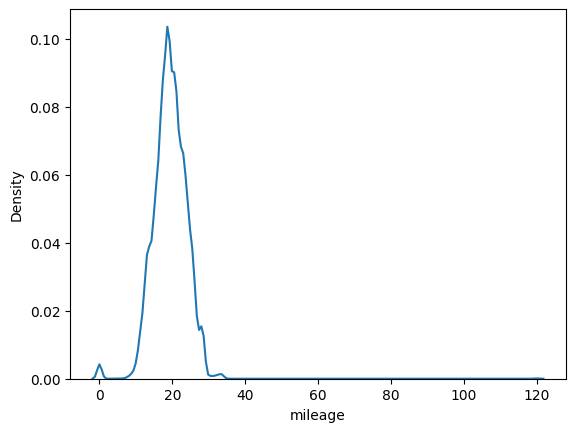

In [21]:
sns.kdeplot(x="mileage" , data=cars_filt)

<Axes: xlabel='mileage'>

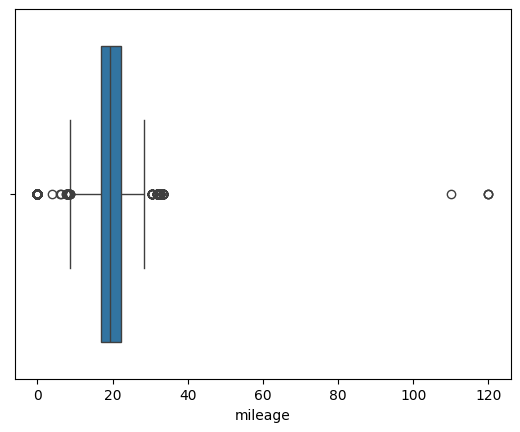

In [22]:
sns.boxplot(x="mileage" , data=cars_filt)

In [23]:
Q1 = cars_filt['mileage'].quantile(0.25)
Q3 = cars_filt['mileage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cars_filtered_mileage = cars_filt[(cars_filt['mileage'] >= lower_bound) & (cars_filt['mileage'] <= upper_bound)]
display(cars_filtered_mileage.head())

selling_price                                       full_name  year  \
0           1.20                                 Maruti Alto Std  2012   
1           5.50                          Hyundai Grand i10 Asta  2016   
2           2.15                                Hyundai i20 Asta  2010   
3           2.26                   Maruti Alto K10 2010-2014 VXI  2012   
4           5.70  Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV  2015   

  seller_type  km_driven fuel_type transmission_type  mileage  engine  \
0  Individual     120000    Petrol            Manual    19.70   796.0   
1  Individual      20000    Petrol            Manual    18.90  1197.0   
2  Individual      60000    Petrol            Manual    17.00  1197.0   
3  Individual      37000    Petrol            Manual    20.92   998.0   
4      Dealer      30000    Diesel            Manual    22.77  1498.0   

   max_power  seats  
0      46.30      5  
1      82.00      5  
2      80.00      5  
3      67.10      5  
4      98.59      5

<Axes: xlabel='mileage', ylabel='Density'>

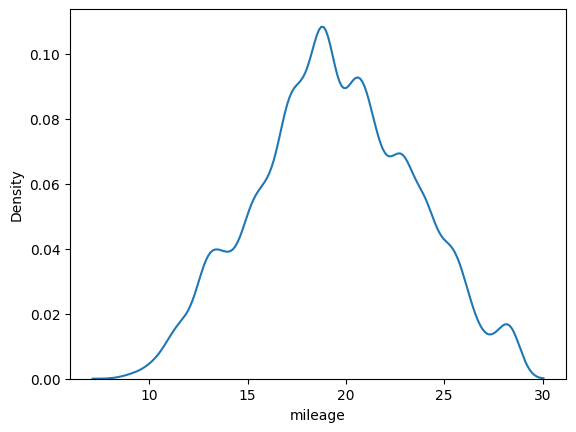

In [24]:
sns.kdeplot(data=cars_filtered_mileage ,x="mileage")

In [25]:
cars_filtered_mileage.shape , cars.shape

((19520, 11), (19980, 11))

In [26]:
# sns.boxplot(data=cars_filtered_mileage , x="km_driven")

# sns.histplot(data=cars_filtered_mileage , x="km_driven")
Q1 = cars_filt['km_driven'].quantile(0.25)
Q3 = cars_filt['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cars_filtered_mileage_km_driven = cars_filt[(cars_filt['km_driven'] >= lower_bound) & (cars_filt['km_driven'] <= upper_bound)]
display(cars_filtered_mileage_km_driven.head())
cars_filtered_mileage_km_driven.shape , cars.shape

selling_price                                       full_name  year  \
0           1.20                                 Maruti Alto Std  2012   
1           5.50                          Hyundai Grand i10 Asta  2016   
2           2.15                                Hyundai i20 Asta  2010   
3           2.26                   Maruti Alto K10 2010-2014 VXI  2012   
4           5.70  Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV  2015   

  seller_type  km_driven fuel_type transmission_type  mileage  engine  \
0  Individual     120000    Petrol            Manual    19.70   796.0   
1  Individual      20000    Petrol            Manual    18.90  1197.0   
2  Individual      60000    Petrol            Manual    17.00  1197.0   
3  Individual      37000    Petrol            Manual    20.92   998.0   
4      Dealer      30000    Diesel            Manual    22.77  1498.0   

   max_power  seats  
0      46.30      5  
1      82.00      5  
2      80.00      5  
3      67.10      5  
4      98.59      5

((19142, 11), (19980, 11))

<Axes: xlabel='km_driven', ylabel='Count'>

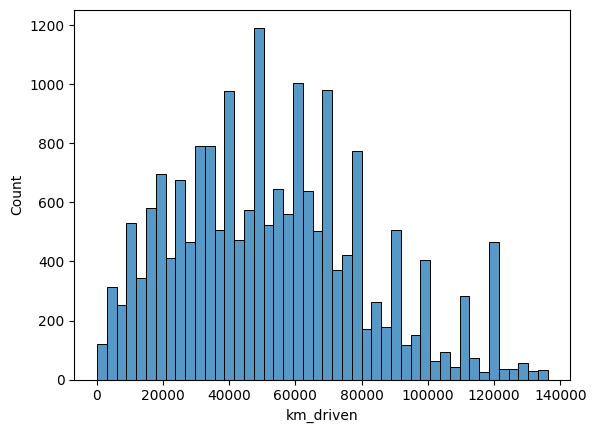

In [27]:
sns.histplot(data=cars_filtered_mileage_km_driven , x="km_driven")

In [28]:
np.unique(cars_filtered_mileage_km_driven["full_name"] , return_counts=True)

(array(['Ambassador Avigo 1800 ISZ MPFI AC', 'Ambassador Classic 2000 Dsz',
        'Audi A3 35 TDI Attraction', ..., 'Volvo XC60 D5 Inscription',
        'Volvo XC60 D5 Summum', 'Volvo XC90 D5 Inscription BSIV'],
       dtype=object),
 array([1, 1, 2, ..., 1, 1, 4]))

In [29]:
cars_value_count=cars_filtered_mileage_km_driven["full_name"].value_counts()

# high_count_cars=cars_value_counts.index[cars_value_counts>10]
high_count_cars=cars_value_count.index[cars_value_count>5]

In [30]:
# sns.histplot(data=cars_filtered_mileage_km_driven["full_name"].value_counts().head(20) , x="full_name")

cars_mod=cars_filtered_mileage_km_driven[cars_filtered_mileage_km_driven["full_name"].isin(high_count_cars)]

In [31]:
cars_mod.shape , cars.shape

((14230, 11), (19980, 11))

In [32]:
cars_mod.head()

selling_price                                       full_name  year  \
1           5.50                          Hyundai Grand i10 Asta  2016   
2           2.15                                Hyundai i20 Asta  2010   
3           2.26                   Maruti Alto K10 2010-2014 VXI  2012   
4           5.70  Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV  2015   
5           3.50                        Maruti Wagon R VXI BS IV  2013   

  seller_type  km_driven fuel_type transmission_type  mileage  engine  \
1  Individual      20000    Petrol            Manual    18.90  1197.0   
2  Individual      60000    Petrol            Manual    17.00  1197.0   
3  Individual      37000    Petrol            Manual    20.92   998.0   
4      Dealer      30000    Diesel            Manual    22.77  1498.0   
5  Individual      35000    Petrol            Manual    18.90   998.0   

   max_power  seats  
1      82.00      5  
2      80.00      5  
3      67.10      5  
4      98.59      5  
5      67.10      5

In [33]:
cars_mod["seats"].value_counts()

seats
5    12395
7     1496
8      167
4       94
6       63
9       15
Name: count, dtype: int64

In [34]:
cars_mod.head()

selling_price                                       full_name  year  \
1           5.50                          Hyundai Grand i10 Asta  2016   
2           2.15                                Hyundai i20 Asta  2010   
3           2.26                   Maruti Alto K10 2010-2014 VXI  2012   
4           5.70  Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV  2015   
5           3.50                        Maruti Wagon R VXI BS IV  2013   

  seller_type  km_driven fuel_type transmission_type  mileage  engine  \
1  Individual      20000    Petrol            Manual    18.90  1197.0   
2  Individual      60000    Petrol            Manual    17.00  1197.0   
3  Individual      37000    Petrol            Manual    20.92   998.0   
4      Dealer      30000    Diesel            Manual    22.77  1498.0   
5  Individual      35000    Petrol            Manual    18.90   998.0   

   max_power  seats  
1      82.00      5  
2      80.00      5  
3      67.10      5  
4      98.59      5  
5      67.10      5

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

# One-hot encode 'seller_type' and 'transmission_type'
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = one_hot_encoder.fit_transform(cars_mod[['seller_type', 'transmission_type', "fuel_type"]])
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(['seller_type', 'transmission_type',"fuel_type"]), index=cars_mod.index)

# Target encode 'full_name'
# To avoid data leakage, we split the data before target encoding.
X = cars_mod.drop('selling_price', axis=1)
y = cars_mod['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

target_encoder = TargetEncoder(cols=['full_name'])
X_train_encoded = target_encoder.fit_transform(X_train, y_train)
X_test_encoded = target_encoder.transform(X_test)

# Combine numerical columns, one-hot encoded features, and target encoded feature
cars_num_train = X_train_encoded.select_dtypes(include=np.number).join(encoded_df)
cars_num_test = X_test_encoded.select_dtypes(include=np.number).join(encoded_df)

# Add the target variable back
cars_num_train['selling_price'] = y_train
cars_num_test['selling_price'] = y_test

# Combine train and test sets for the final numerical dataframe
cars_num = pd.concat([cars_num_train, cars_num_test])

display(cars_num.head())

full_name  year  km_driven  mileage  engine  max_power  seats  \
18016   5.560258  2013      90000    23.40  1248.0       74.0      5   
9417    3.775548  2018      21400    23.01   999.0       67.0      5   
2985    5.817859  2018      15300    23.01   999.0       67.0      5   
7773    5.807309  2016      15000    17.21  1493.0      100.0      7   
2581    6.105485  2013      65600    17.21  1493.0      100.0      7   

       seller_type_Dealer  seller_type_Individual  \
18016                 0.0                     1.0   
9417                  0.0                     1.0   
2985                  1.0                     0.0   
7773                  0.0                     1.0   
2581                  0.0                     1.0   

       seller_type_Trustmark Dealer  transmission_type_Automatic  \
18016                           0.0                          0.0   
9417                            0.0                          0.0   
2985                            0.0                          0.0   
7773                            0.0                          0.0   
2581                            0.0                          0.0   

       transmission_type_Manual  fuel_type_CNG  fuel_type_Diesel  \
18016                       1.0            0.0               1.0   
9417                        1.0            0.0               0.0   
2985                        1.0            0.0               0.0   
7773                        1.0            0.0               1.0   
2581                        1.0            0.0               1.0   

       fuel_type_Electric  fuel_type_LPG  fuel_type_Petrol  selling_price  
18016                 0.0            0.0               0.0           5.50  
9417                  0.0            0.0               1.0           3.65  
2985                  0.0            0.0               1.0           4.11  
7773                  0.0            0.0               0.0           6.00  
2581                  0.0            0.0               0.0           2.75

In [36]:
!pip install category_encoders

In [37]:
cars_num.shape , cars.shape

((14230, 18), (19980, 11))

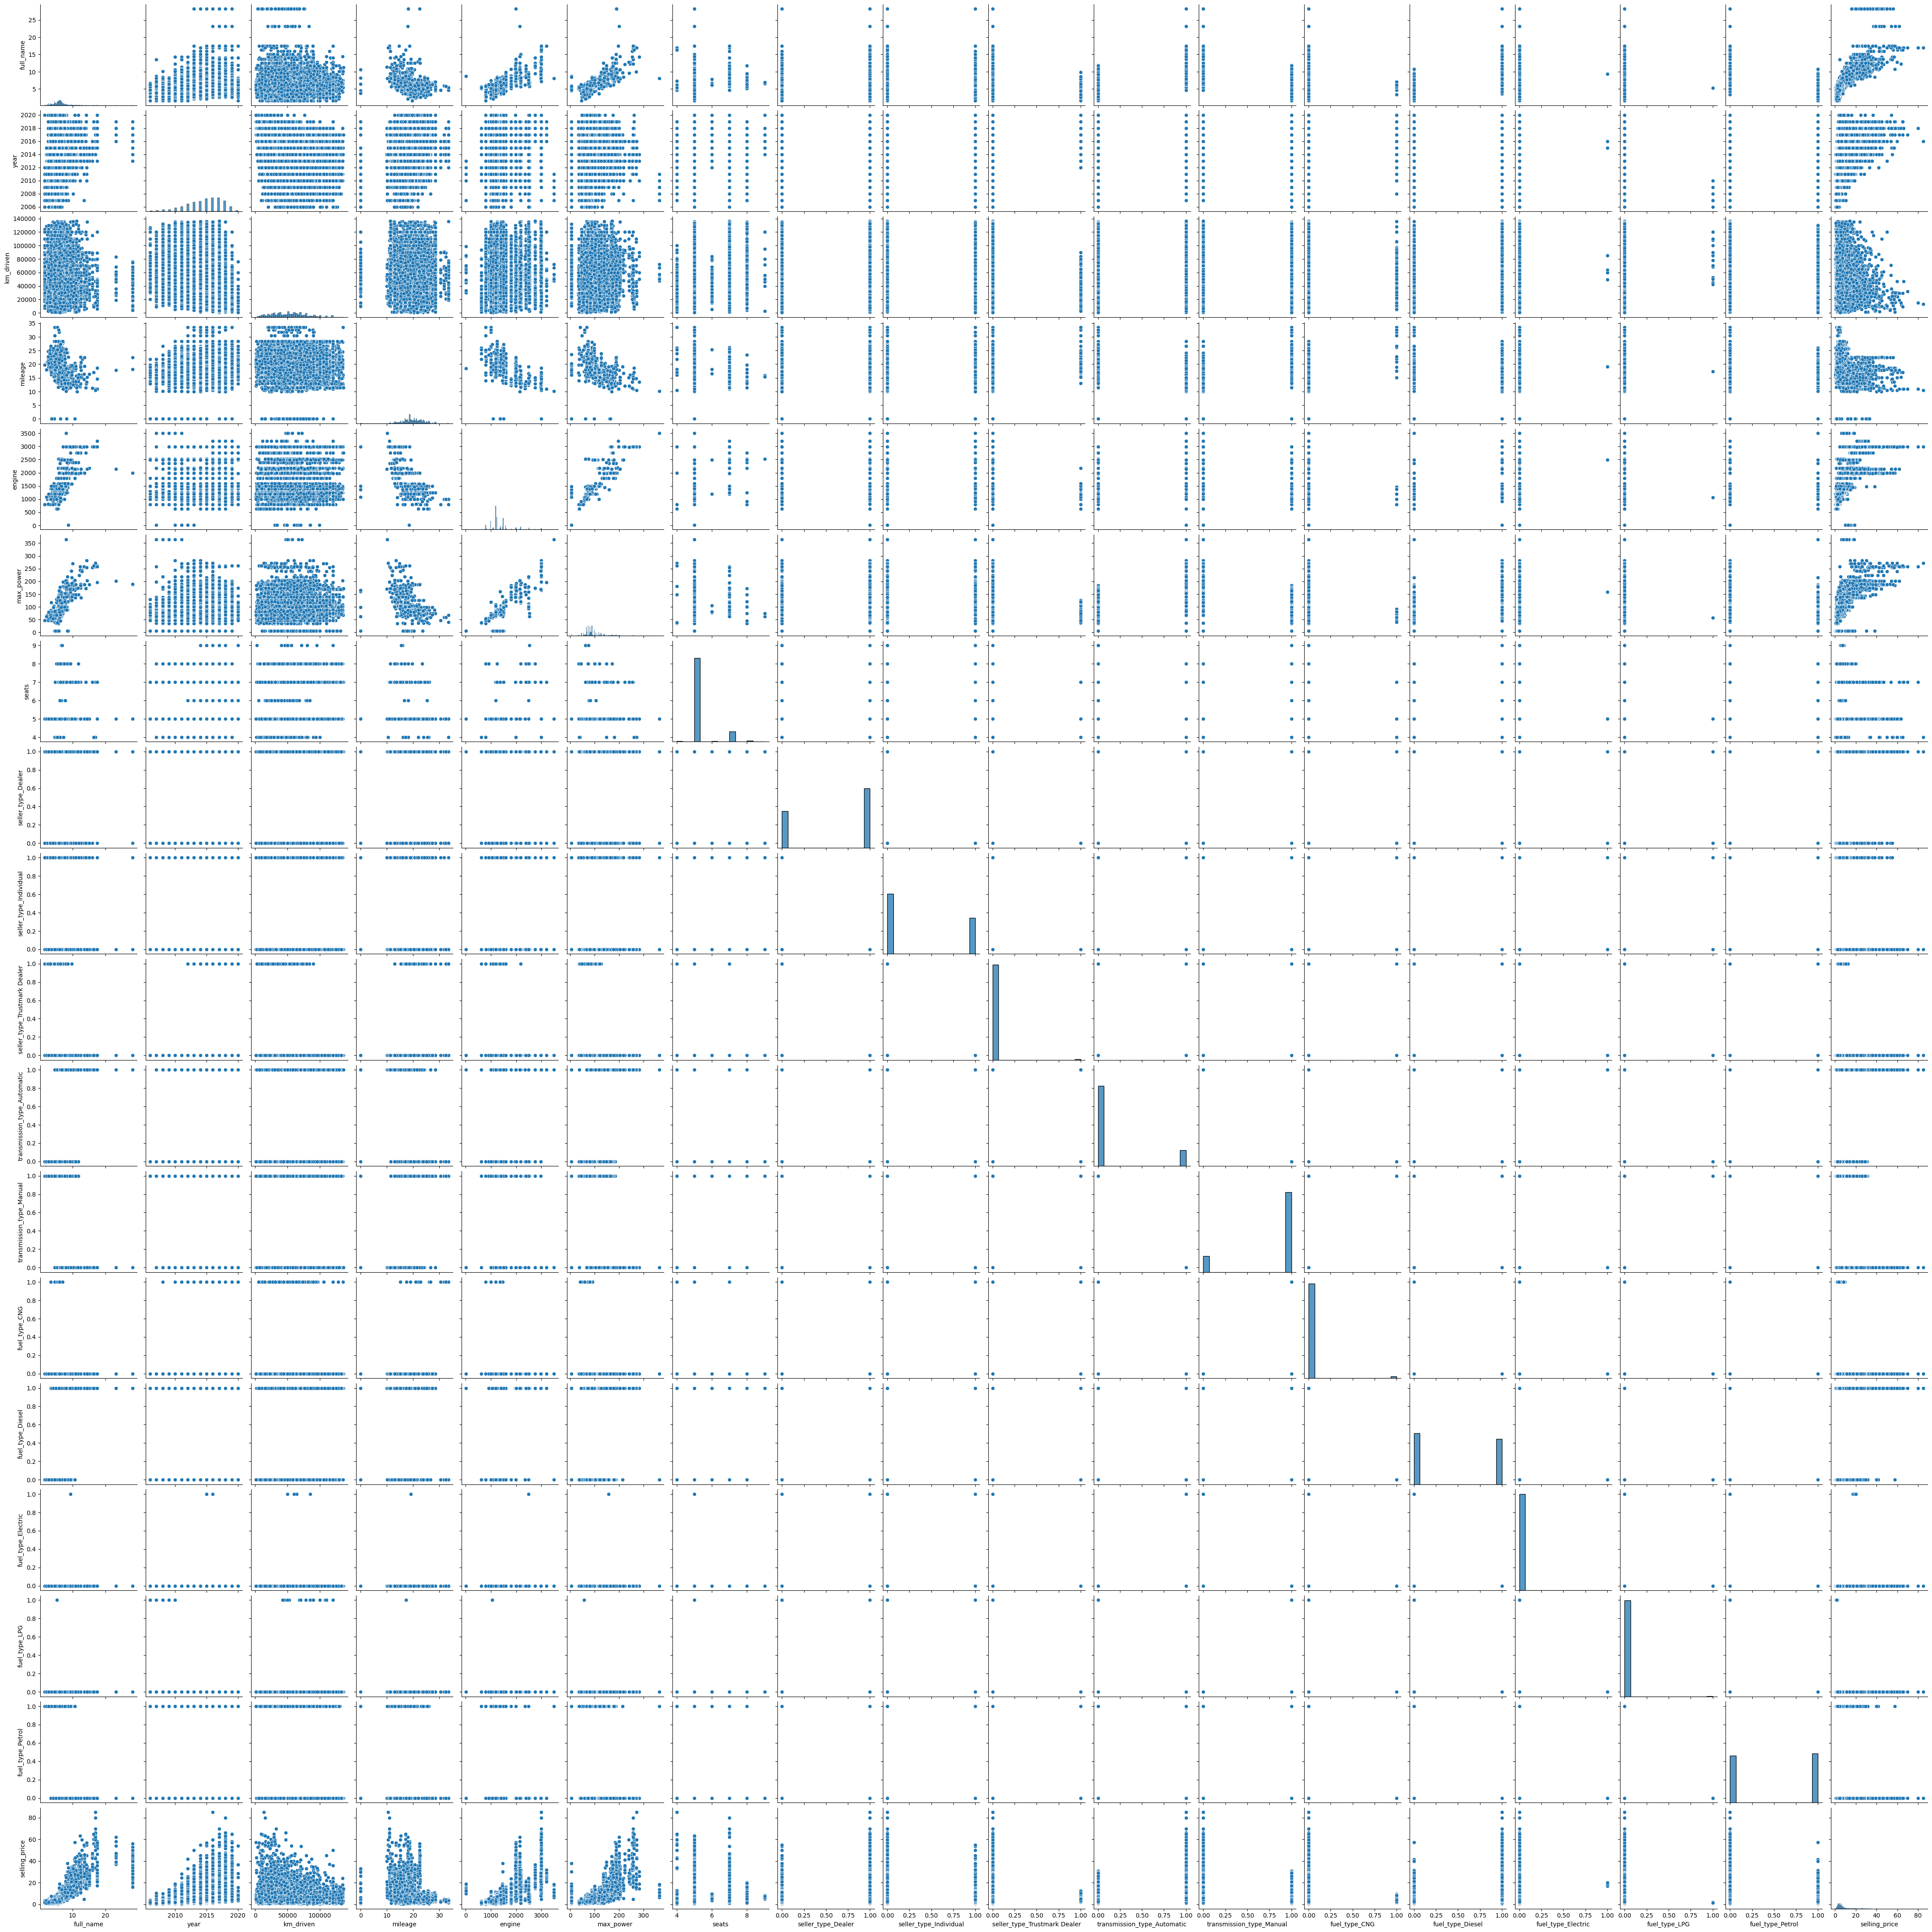

In [38]:
sns.pairplot(cars_num)

In [39]:
cars_num.head()

full_name  year  km_driven  mileage  engine  max_power  seats  \
18016   5.560258  2013      90000    23.40  1248.0       74.0      5   
9417    3.775548  2018      21400    23.01   999.0       67.0      5   
2985    5.817859  2018      15300    23.01   999.0       67.0      5   
7773    5.807309  2016      15000    17.21  1493.0      100.0      7   
2581    6.105485  2013      65600    17.21  1493.0      100.0      7   

       seller_type_Dealer  seller_type_Individual  \
18016                 0.0                     1.0   
9417                  0.0                     1.0   
2985                  1.0                     0.0   
7773                  0.0                     1.0   
2581                  0.0                     1.0   

       seller_type_Trustmark Dealer  transmission_type_Automatic  \
18016                           0.0                          0.0   
9417                            0.0                          0.0   
2985                            0.0                          0.0   
7773                            0.0                          0.0   
2581                            0.0                          0.0   

       transmission_type_Manual  fuel_type_CNG  fuel_type_Diesel  \
18016                       1.0            0.0               1.0   
9417                        1.0            0.0               0.0   
2985                        1.0            0.0               0.0   
7773                        1.0            0.0               1.0   
2581                        1.0            0.0               1.0   

       fuel_type_Electric  fuel_type_LPG  fuel_type_Petrol  selling_price  
18016                 0.0            0.0               0.0           5.50  
9417                  0.0            0.0               1.0           3.65  
2985                  0.0            0.0               1.0           4.11  
7773                  0.0            0.0               0.0           6.00  
2581                  0.0            0.0               0.0           2.75

<Axes: >

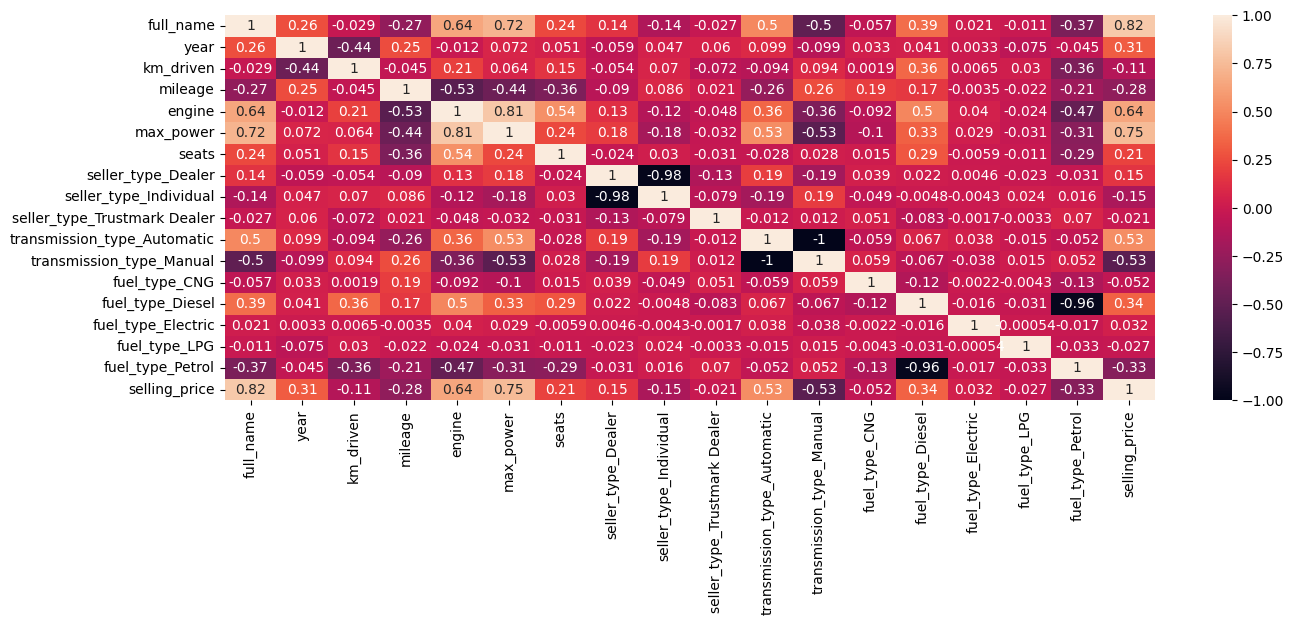

In [40]:
fig=plt.figure(figsize=(15,5))
sns.heatmap(cars_num.corr() , annot =True)

In [41]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   selling_price      19980 non-null  float64
 1   full_name          19980 non-null  object 
 2   year               19980 non-null  int64  
 3   seller_type        19980 non-null  object 
 4   km_driven          19980 non-null  int64  
 5   fuel_type          19980 non-null  object 
 6   transmission_type  19980 non-null  object 
 7   mileage            19980 non-null  float64
 8   engine             19980 non-null  float64
 9   max_power          19980 non-null  float64
 10  seats              19980 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.7+ MB


In [42]:
cars_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14230 entries, 18016 to 5241
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   full_name                     14230 non-null  float64
 1   year                          14230 non-null  int64  
 2   km_driven                     14230 non-null  int64  
 3   mileage                       14230 non-null  float64
 4   engine                        14230 non-null  float64
 5   max_power                     14230 non-null  float64
 6   seats                         14230 non-null  int64  
 7   seller_type_Dealer            14230 non-null  float64
 8   seller_type_Individual        14230 non-null  float64
 9   seller_type_Trustmark Dealer  14230 non-null  float64
 10  transmission_type_Automatic   14230 non-null  float64
 11  transmission_type_Manual      14230 non-null  float64
 12  fuel_type_CNG                 14230 non-null  float64
 13  fue

In [43]:
cars["seller_type"].value_counts()

seller_type
Dealer              11973
Individual           7817
Trustmark Dealer      190
Name: count, dtype: int64

In [44]:
cars["fuel_type"].value_counts()

fuel_type
Diesel      9817
Petrol      9767
CNG          316
LPG           66
Electric      14
Name: count, dtype: int64

In [45]:
X=cars_num.drop("selling_price" , axis=1)
y=cars_num["selling_price"]

In [46]:
cars_num.describe()

full_name          year      km_driven       mileage        engine  \
count  14230.000000  14230.000000   14230.000000  14230.000000  14230.000000   
mean       6.198240   2014.695011   53663.687913     20.007482   1401.922188   
std        2.514670      2.839368   28069.796849      4.090214    452.954878   
min        1.606644   2006.000000     100.000000      0.000000     17.000000   
25%        4.949932   2013.000000   32000.000000     17.500000   1197.000000   
50%        6.020255   2015.000000   51000.000000     19.810000   1248.000000   
75%        6.805833   2017.000000   70000.000000     22.770000   1498.000000   
max       28.206429   2020.000000  136226.000000     33.540000   3498.000000   

          max_power         seats  seller_type_Dealer  seller_type_Individual  \
count  14230.000000  14230.000000        14230.000000            14230.000000   
mean      93.178752      5.247505            0.616374                0.373226   
std       37.443655      0.702009            0.486286                0.483678   
min        5.000000      4.000000            0.000000                0.000000   
25%       73.000000      5.000000            0.000000                0.000000   
50%       83.140000      5.000000            1.000000                0.000000   
75%      103.500000      5.000000            1.000000                1.000000   
max      364.900000      9.000000            1.000000                1.000000   

       seller_type_Trustmark Dealer  transmission_type_Automatic  \
count                  14230.000000                 14230.000000   
mean                       0.010401                     0.166620   
std                        0.101455                     0.372649   
min                        0.000000                     0.000000   
25%                        0.000000                     0.000000   
50%                        0.000000                     0.000000   
75%                        0.000000                     0.000000   
max                        1.000000                     1.000000   

       transmission_type_Manual  fuel_type_CNG  fuel_type_Diesel  \
count              14230.000000   14230.000000      14230.000000   
mean                   0.833380       0.016936          0.470274   
std                    0.372649       0.129036          0.499133   
min                    0.000000       0.000000          0.000000   
25%                    1.000000       0.000000          0.000000   
50%                    1.000000       0.000000          0.000000   
75%                    1.000000       0.000000          1.000000   
max                    1.000000       1.000000          1.000000   

       fuel_type_Electric  fuel_type_LPG  fuel_type_Petrol  selling_price  
count        14230.000000   14230.000000      14230.000000   14230.000000  
mean             0.000281       0.001054          0.511455       6.596353  
std              0.016764       0.032451          0.499886       6.212320  
min              0.000000       0.000000          0.000000       0.250000  
25%              0.000000       0.000000          0.000000       3.400000  
50%              0.000000       0.000000          1.000000       5.000000  
75%              0.000000       0.000000          1.000000       7.400000  
max              1.000000       1.000000          1.000000      85.000000

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [48]:
scaler = StandardScaler()
X = cars_num.drop('selling_price', axis=1)
y = cars_num['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [50]:
X_train=pd.DataFrame(X_train , columns=X.columns)
X_test=pd.DataFrame(X_test , columns=X.columns)


In [51]:
X_train.describe()

full_name          year     km_driven       mileage        engine  \
count  1.138400e+04  1.138400e+04  1.138400e+04  1.138400e+04  1.138400e+04   
mean  -9.549634e-17 -1.864675e-15  1.309174e-16 -4.374575e-16  3.120796e-17   
std    1.000044e+00  1.000044e+00  1.000044e+00  1.000044e+00  1.000044e+00   
min   -1.827364e+00 -3.042791e+00 -1.900862e+00 -4.899570e+00 -3.056711e+00   
25%   -4.998709e-01 -5.912811e-01 -7.688796e-01 -6.097757e-01 -4.521320e-01   
50%   -7.354528e-02  1.091501e-01 -9.465811e-02 -4.352283e-02 -3.395612e-01   
75%    2.349046e-01  8.095814e-01  5.795634e-01  6.747114e-01  2.122564e-01   
max    8.734409e+00  1.860228e+00  2.929616e+00  3.322127e+00  4.626797e+00   

          max_power         seats  seller_type_Dealer  seller_type_Individual  \
count  1.138400e+04  1.138400e+04        1.138400e+04            1.138400e+04   
mean  -2.496636e-17 -3.994618e-17       -1.248318e-17            5.242937e-17   
std    1.000044e+00  1.000044e+00        1.000044e+00            1.000044e+00   
min   -2.335667e+00 -1.781756e+00       -1.273512e+00           -7.689458e-01   
25%   -5.370011e-01 -3.497093e-01       -1.273512e+00           -7.689458e-01   
50%   -2.687883e-01 -3.497093e-01        7.852300e-01           -7.689458e-01   
75%    2.697534e-01 -3.497093e-01        7.852300e-01            1.300482e+00   
max    7.184036e+00  5.378478e+00        7.852300e-01            1.300482e+00   

       seller_type_Trustmark Dealer  transmission_type_Automatic  \
count                  1.138400e+04                 1.138400e+04   
mean                   3.744955e-18                 3.807371e-17   
std                    1.000044e+00                 1.000044e+00   
min                   -9.968011e-02                -4.495686e-01   
25%                   -9.968011e-02                -4.495686e-01   
50%                   -9.968011e-02                -4.495686e-01   
75%                   -9.968011e-02                -4.495686e-01   
max                    1.003209e+01                 2.224355e+00   

       transmission_type_Manual  fuel_type_CNG  fuel_type_Diesel  \
count              1.138400e+04   1.138400e+04      1.138400e+04   
mean              -1.135970e-16   2.808716e-17      5.430184e-17   
std                1.000044e+00   1.000044e+00      1.000044e+00   
min               -2.224355e+00  -1.274641e-01     -9.376396e-01   
25%                4.495686e-01  -1.274641e-01     -9.376396e-01   
50%                4.495686e-01  -1.274641e-01     -9.376396e-01   
75%                4.495686e-01  -1.274641e-01      1.066508e+00   
max                4.495686e-01   7.845346e+00      1.066508e+00   

       fuel_type_Electric  fuel_type_LPG  fuel_type_Petrol  
count        1.138400e+04   1.138400e+04      1.138400e+04  
mean         2.496636e-18  -2.496636e-17      2.184557e-17  
std          1.000044e+00   1.000044e+00      1.000044e+00  
min         -1.325579e-02  -2.965128e-02     -1.030689e+00  
25%         -1.325579e-02  -2.965128e-02     -1.030689e+00  
50%         -1.325579e-02  -2.965128e-02      9.702252e-01  
75%         -1.325579e-02  -2.965128e-02      9.702252e-01  
max          7.543872e+01   3.372536e+01      9.702252e-01

In [52]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


from sklearn.metrics import r2_score



# Define model
ridge = Ridge()

ridge.fit(X_train, y_train)

y_hat_train=ridge.predict(X_train)
y_hat_test=ridge.predict(X_test)

mse = mean_squared_error(y_train, y_hat_train)
print("Train MSE:", mse)
print("Test MSE" , mean_squared_error(y_test , y_hat_test))
train_r2=r2_score(y_train , y_hat_train)
test_r2=r2_score(y_test , y_hat_test)

print("Train R2:", train_r2)
print("Test R2:", test_r2)

print(ridge.coef_ , ridge.intercept_)

Train MSE: 9.385561766818494
Test MSE 9.200276237222207
Train R2: 0.759165029506968
Test R2: 0.7517326891287509
[ 2.86191033  0.82227701 -0.53861585 -0.15024363  0.59418084  1.66153113
 -0.15449949  0.03094822 -0.0266125  -0.02201381  0.28331461 -0.28331461
  0.09905902  0.17991468  0.02364214  0.01566745 -0.20604065] 6.618039633696418


In [53]:

param_grid = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    "fit_intercept": [True, False],
    "solver": ["auto", "svd", "cholesky", "lsqr", "sag", "saga"],
    "max_iter": [1000, 500]
}

grid = GridSearchCV(ridge, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best R² Score:", grid.best_score_)


Best Parameters: {'alpha': 100, 'fit_intercept': True, 'max_iter': 1000, 'solver': 'svd'}
Best R² Score: 0.756715124081362


In [54]:
print(grid.best_coef_ , grid.best_intercept_)

AttributeError: 'GridSearchCV' object has no attribute 'best_coef_'

In [55]:
# Create polynomial features (degree=2 for quadratic)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit linear regression on transformed features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_pred_poly = model.predict(X_test_poly)

# Print coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))



Intercept: 5.296911022214835
Coefficients: [ 1.35808651e+00  1.60977696e+00 -3.41831308e-01  1.00075029e-01
  8.34251775e-01  1.34160060e+00 -5.46932429e-01  5.79496228e-02
 -5.82381228e-02 -6.00888979e-05  1.06920996e-02 -1.06920996e-02
 -3.03276550e-03  1.48147519e-01  1.92480049e-05 -7.66090254e-05
 -1.47143326e-01 -6.57004145e-01  8.08862195e-01 -4.19642238e-01
 -8.77662265e-02 -1.90486096e+00  2.45492121e+00  6.41111800e-01
  1.74115070e-02 -1.19600875e-03 -7.98323808e-02  3.10054747e-01
 -3.10054747e-01 -1.59342003e-01  5.68082511e-01 -1.79781172e-02
 -4.02418786e-02 -5.24314087e-01 -1.37472772e-01 -1.72211638e-02
  8.63372592e-02  2.85487964e-01  6.55158750e-01 -2.38326521e-01
  2.47430511e-02 -3.26218945e-02  3.79455130e-02 -1.84915597e-03
  1.84915597e-03  2.56292445e-02 -1.65426269e-02 -2.13367689e-02
 -1.18727882e-02  1.13534557e-02  1.27577752e-01  1.09759544e-01
  1.57622182e-01 -1.25749526e-01  1.06114199e-01  5.33154427e-02
 -5.86036007e-02  2.45356436e-02 -9.45960728e-0

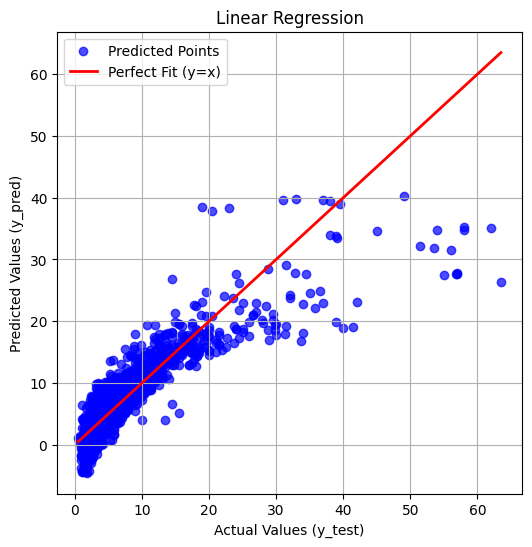

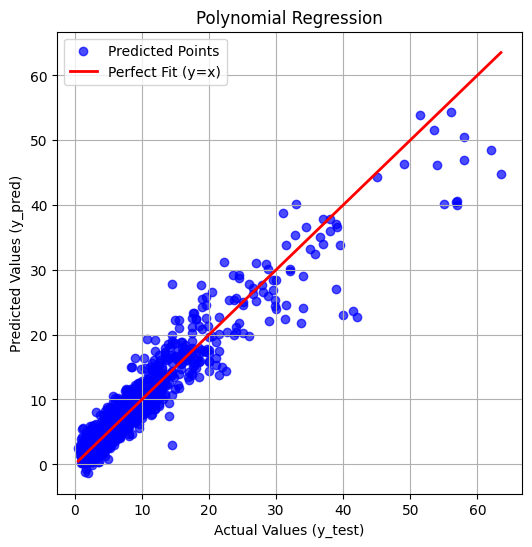

In [56]:
def plot_actual_vs_pred(y_test, y_pred, title="Actual vs Predicted"):
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, color="blue", alpha=0.7, label="Predicted Points")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             color="red", linewidth=2, label="Perfect Fit (y=x)")

    plt.xlabel("Actual Values (y_test)")
    plt.ylabel("Predicted Values (y_pred)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


plot_actual_vs_pred(y_test, y_hat_test, title="Linear Regression")

plot_actual_vs_pred(y_test , y_pred_poly , title="Polynomial Regression")

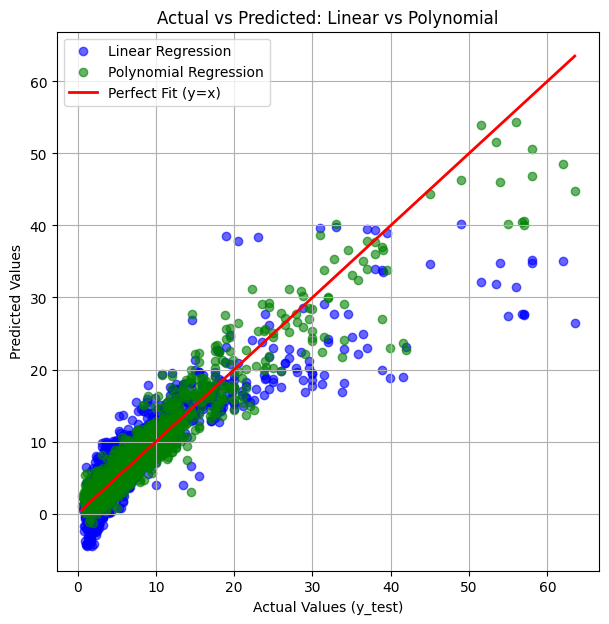

In [57]:
def compare_models_plot(y_test, y_pred_lin, y_pred_poly):
    plt.figure(figsize=(7,7))

    # Scatter plots
    plt.scatter(y_test, y_pred_lin, color="blue", alpha=0.6, label="Linear Regression")
    plt.scatter(y_test, y_pred_poly, color="green", alpha=0.6, label="Polynomial Regression")

    # Perfect prediction line (y = x)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             color="red", linewidth=2, label="Perfect Fit (y=x)")

    plt.xlabel("Actual Values (y_test)")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted: Linear vs Polynomial")
    plt.legend()
    plt.grid(True)
    plt.show()

compare_models_plot(y_test, y_hat_test, y_pred_poly)

In [ ]:
X_train.shape


Neural network sequential

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def build_regression_model(n_features, n_hidden1=64, n_hidden2=32,n_hidden3=16, learning_rate=0.001):
    """
    Build a Sequential Neural Network for regression.

    Parameters:
    -----------
    n_features : int
        Number of input features
    n_hidden1 : int
        Number of neurons in the first hidden layer
    n_hidden2 : int
        Number of neurons in the second hidden layer
    learning_rate : float
        Learning rate for the optimizer
    """

    model = Sequential([
        Dense(n_hidden1, activation='relu', input_shape=(n_features,)),  # Hidden Layer 1
        Dense(n_hidden2, activation='relu'),                             # Hidden Layer 2
        Dense(n_hidden3,activation ="relu"),
        Dense(1, activation='linear')                                    # Output Layer (regression)
    ])

    # Compile with MSE loss for regression
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='mse',
                  metrics=['mae'])

    return model


# Example usage:
# Assume we have 10 input features
n_features = 17
model = build_regression_model(n_features, n_hidden1=64, n_hidden2=32 , n_hidden3=16)

model.fit(X_train, y_train, epochs=150, batch_size=1138, validation_split=0.2)
y_pred_nn = model.predict(X_test)
y_train_pred_nn = model.predict(X_train)
print("R² Score test:", r2_score(y_test, y_pred_nn))
print("R² Score train:", r2_score(y_train, y_train_pred_nn))


Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 70.6918 - mae: 5.9374 - val_loss: 58.6257 - val_mae: 5.3937
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 59.7325 - mae: 5.2145 - val_loss: 47.0602 - val_mae: 4.6094
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 45.3077 - mae: 4.3726 - val_loss: 34.7982 - val_mae: 3.7077
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 33.7377 - mae: 3.4783 - val_loss: 23.5033 - val_mae: 2.8254
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.4065 - mae: 2.6702 - val_loss: 15.8128 - val_mae: 2.2499
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15.0038 - mae: 2.2045 - val_loss: 12.8665 - val_mae: 2.0670
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.7250 - mae: 2.0487 - val_loss: 11.2547 - val_mae: 1.9153
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.5724 - mae: 1.9079 - val_loss: 9.7980 - val_mae: 1.7405
Epoch 9/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8.9666 - ma

In [ ]:
compare_models_plot(y_test, y_pred_nn, y_pred_poly)

In [59]:
from threading import main_thread
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


def build_regression_model(n_features, n_hidden1=64, n_hidden2=32,n_hidden3=16, learning_rate=0.001):
    """
    Build a Sequential Neural Network for regression.

    Parameters:
    -----------
    n_features : int
        Number of input features
    n_hidden1 : int
        Number of neurons in the first hidden layer
    n_hidden2 : int
        Number of neurons in the second hidden layer
    learning_rate : float
        Learning rate for the optimizer
    """

    model = Sequential([
        Dense(n_hidden1, activation='relu', input_shape=(n_features,)),  # Hidden Layer 1
        Dense(n_hidden2, activation='relu'),                             # Hidden Layer 2
        Dense(n_hidden3,activation ="relu"),
        Dense(1, activation='linear')                                    # Output Layer (regression)
    ])

    # Compile with MSE loss for regression
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='mse',
                  metrics=['mae'])

    return model


# Example usage:
# Assume we have 10 input features
n_features = 17
model = build_regression_model(n_features, n_hidden1=64, n_hidden2=32 , n_hidden3=16)
early_stop = EarlyStopping(
    monitor='val_loss',    # what to monitor (val_loss is common)
    patience=10,            # number of epochs with no improvement before stopping
    restore_best_weights=True,
    min_delta=0,
    verbose=1# revert to the best weights
)

checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',
    save_best_only=True,   # only keep the best model
    verbose=1
)

model.fit(X_train, y_train, epochs=300, batch_size=1138, validation_split=0.2 , callbacks=[early_stop , checkpoint])
y_test_pred_nn = model.predict(X_test)
y_train_pred_nn = model.predict(X_train)
print("R² Score test:", r2_score(y_test, y_test_pred_nn))
print("R² Score test:", r2_score(y_train, y_train_pred_nn))


Epoch 1/300


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/9 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - loss: 76.5316 - mae: 6.7807
Epoch 1: val_loss improved from inf to 75.42420, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 85.3555 - mae: 6.8720 - val_loss: 75.4242 - val_mae: 6.3852
Epoch 2/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 75.7467 - mae: 6.2494
Epoch 2: val_loss improved from 75.42420 to 66.71393, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.8315 - mae: 6.1941 - val_loss: 66.7139 - val_mae: 5.7632
Epoch 3/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 65.8112 - mae: 5.7439
Epoch 3: val_loss improved from 66.71393 to 57.44706, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 67.2135 - mae: 5.5953 - val_loss: 57.4471 - val_mae: 5.1205
Epoch 4/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 63.2592 - mae: 5.1170
Epoch 4: val_loss improved from 57.44706 to 46.43149, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 58.2418 - mae: 4.9470 - val_loss: 46.4315 - val_mae: 4.3944
Epoch 5/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 52.2459 - mae: 4.3663
Epoch 5: val_loss improved from 46.43149 to 34.48505, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 47.1115 - mae: 4.1887 - val_loss: 34.4851 - val_mae: 3.5786
Epoch 6/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 32.9763 - mae: 3.4815
Epoch 6: val_loss improved from 34.48505 to 23.45727, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 32.8176 - mae: 3.3412 - val_loss: 23.4573 - val_mae: 2.8036
Epoch 7/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 24.5098 - mae: 2.8230
Epoch 7: val_loss improved from 23.45727 to 16.65294, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 21.4563 - mae: 2.6641 - val_loss: 16.6529 - val_mae: 2.3849
Epoch 8/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 20.3168 - mae: 2.5241
Epoch 8: val_loss improved from 16.65294 to 14.81299, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.8807 - mae: 2.3794 - val_loss: 14.8130 - val_mae: 2.2989
Epoch 9/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.3514 - mae: 2.2650
Epoch 9: val_loss improved from 14.81299 to 14.18928, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 14.0303 - mae: 2.3467 - val_loss: 14.1893 - val_mae: 2.2274
Epoch 10/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.0970 - mae: 2.1203
Epoch 10: val_loss improved from 14.18928 to 11.31428, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.7004 - mae: 2.1592 - val_loss: 11.3143 - val_mae: 1.9624
Epoch 11/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.2166 - mae: 1.9904
Epoch 11: val_loss improved from 11.31428 to 10.02104, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.1194 - mae: 1.9615 - val_loss: 10.0210 - val_mae: 1.8226
Epoch 12/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.7029 - mae: 1.9053
Epoch 12: val_loss improved from 10.02104 to 9.31189, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.1523 - mae: 1.8238 - val_loss: 9.3119 - val_mae: 1.7314
Epoch 13/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.1069 - mae: 1.7464
Epoch 13: val_loss improved from 9.31189 to 8.69083, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.1443 - mae: 1.7206 - val_loss: 8.6908 - val_mae: 1.6408
Epoch 14/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 9.9343 - mae: 1.6582
Epoch 14: val_loss improved from 8.69083 to 8.22298, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.6734 - mae: 1.6395 - val_loss: 8.2230 - val_mae: 1.5681
Epoch 15/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.6061 - mae: 1.4971
Epoch 15: val_loss improved from 8.22298 to 7.88027, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.9326 - mae: 1.5482 - val_loss: 7.8803 - val_mae: 1.5058
Epoch 16/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.4044 - mae: 1.5984
Epoch 16: val_loss improved from 7.88027 to 7.51380, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.2059 - mae: 1.5152 - val_loss: 7.5138 - val_mae: 1.4690
Epoch 17/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.1702 - mae: 1.4056
Epoch 17: val_loss improved from 7.51380 to 7.22911, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.1133 - mae: 1.4590 - val_loss: 7.2291 - val_mae: 1.4352
Epoch 18/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.7720 - mae: 1.4924
Epoch 18: val_loss improved from 7.22911 to 7.03915, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.4480 - mae: 1.4356 - val_loss: 7.0391 - val_mae: 1.4362
Epoch 19/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - loss: 5.7740 - mae: 1.4299
Epoch 19: val_loss did not improve from 7.03915
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.8575 - mae: 1.4567 - val_loss: 7.7701 - val_mae: 1.5685
Epoch 20/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.1525 - mae: 1.5944
Epoch 20: val_loss improved from 7.03915 to 6.85065, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.4040 - mae: 1.5468 - val_loss: 6.8506 - val_mae: 1.4492
Epoch 21/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.2158 - mae: 1.4760
Epoch 21: val_loss improved from 6.85065 to 6.73378, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.7291 - mae: 1.4303 - val_loss: 6.7338 - val_mae: 1.4136
Epoch 22/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4431 - mae: 1.3976 
Epoch 22: val_loss improved from 6.73378 to 6.54422, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 6.4696 - mae: 1.3963 - val_loss: 6.5442 - val_mae: 1.3848
Epoch 23/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 2s 342ms/step - loss: 8.9234 - mae: 1.4160
Epoch 23: val_loss improved from 6.54422 to 6.51077, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.9139 - mae: 1.3778 - val_loss: 6.5108 - val_mae: 1.3943
Epoch 24/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.8363 - mae: 1.3881
Epoch 24: val_loss did not improve from 6.51077
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.3385 - mae: 1.3600 - val_loss: 6.7325 - val_mae: 1.3706
Epoch 25/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.8521 - mae: 1.2811
Epoch 25: val_loss improved from 6.51077 to 6.46850, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.4554 - mae: 1.3359 - val_loss: 6.4685 - val_mae: 1.3660
Epoch 26/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5.7399 - mae: 1.3634
Epoch 26: val_loss did not improve from 6.46850
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.7262 - mae: 1.4124 - val_loss: 7.5753 - val_mae: 1.5410
Epoch 27/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 8.3906 - mae: 1.5817
Epoch 27: val_loss did not improve from 6.46850
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.6993 - mae: 1.5153 - val_loss: 6.7311 - val_mae: 1.4165
Epoch 28/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.6356 - mae: 1.4486
Epoch 28: val_loss improved from 6.46850 to 6.33682, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.6716 - mae: 1.3847 - val_loss: 6.3368 - val_mae: 1.3444
Epoch 29/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 4.8654 - mae: 1.2915
Epoch 29: val_loss improved from 6.33682 to 6.24997, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.8731 - mae: 1.3012 - val_loss: 6.2500 - val_mae: 1.3218
Epoch 30/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5.0592 - mae: 1.2344
Epoch 30: val_loss did not improve from 6.24997
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.9927 - mae: 1.3266 - val_loss: 7.2449 - val_mae: 1.4952
Epoch 31/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.7558 - mae: 1.4319
Epoch 31: val_loss did not improve from 6.24997
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.9472 - mae: 1.4390 - val_loss: 6.6030 - val_mae: 1.4019
Epoch 32/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.6946 - mae: 1.3686
Epoch 32: val_loss did not improve from 6.24997
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.2837 - mae: 1.3496 - val_loss: 6.3120 - val_mae: 1.3634
Epoch 33/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 8.2264 - mae: 1.4472
Epoch 33: val_loss did not improve from 6.24997
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.3039 - mae: 1.5061 - val

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.1016 - mae: 1.4295 - val_loss: 6.2428 - val_mae: 1.3724
Epoch 36/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.2448 - mae: 1.4099
Epoch 36: val_loss did not improve from 6.24280
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.5660 - mae: 1.3667 - val_loss: 6.2487 - val_mae: 1.3414
Epoch 37/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5.4359 - mae: 1.2940
Epoch 37: val_loss did not improve from 6.24280
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.9685 - mae: 1.3195 - val_loss: 6.2536 - val_mae: 1.3183
Epoch 38/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.1683 - mae: 1.3142
Epoch 38: val_loss improved from 6.24280 to 6.09700, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.2220 - mae: 1.3112 - val_loss: 6.0970 - val_mae: 1.3042
Epoch 39/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5.3923 - mae: 1.2999
Epoch 39: val_loss improved from 6.09700 to 5.98277, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.1990 - mae: 1.3188 - val_loss: 5.9828 - val_mae: 1.2991
Epoch 40/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.7426 - mae: 1.3259
Epoch 40: val_loss improved from 5.98277 to 5.91982, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.3512 - mae: 1.3122 - val_loss: 5.9198 - val_mae: 1.2892
Epoch 41/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.7801 - mae: 1.2503
Epoch 41: val_loss improved from 5.91982 to 5.89023, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.0376 - mae: 1.2763 - val_loss: 5.8902 - val_mae: 1.2803
Epoch 42/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.2453 - mae: 1.2951
Epoch 42: val_loss did not improve from 5.89023
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.9140 - mae: 1.2594 - val_loss: 5.9612 - val_mae: 1.2725
Epoch 43/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4.5939 - mae: 1.1590
Epoch 43: val_loss did not improve from 5.89023
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.7186 - mae: 1.2522 - val_loss: 5.9114 - val_mae: 1.2639
Epoch 44/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3.9333 - mae: 1.1563
Epoch 44: val_loss improved from 5.89023 to 5.81687, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.4981 - mae: 1.2273 - val_loss: 5.8169 - val_mae: 1.2623
Epoch 45/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 5.8110 - mae: 1.2135
Epoch 45: val_loss improved from 5.81687 to 5.75821, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.8612 - mae: 1.2440 - val_loss: 5.7582 - val_mae: 1.2643
Epoch 46/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.0837 - mae: 1.2947
Epoch 46: val_loss improved from 5.75821 to 5.73301, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.8360 - mae: 1.2472 - val_loss: 5.7330 - val_mae: 1.2660
Epoch 47/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.7510 - mae: 1.3719
Epoch 47: val_loss improved from 5.73301 to 5.69768, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.9452 - mae: 1.2616 - val_loss: 5.6977 - val_mae: 1.2575
Epoch 48/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5.8547 - mae: 1.2627
Epoch 48: val_loss improved from 5.69768 to 5.67316, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.4172 - mae: 1.2370 - val_loss: 5.6732 - val_mae: 1.2501
Epoch 49/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.2505 - mae: 1.3129
Epoch 49: val_loss did not improve from 5.67316
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.7627 - mae: 1.2445 - val_loss: 5.7215 - val_mae: 1.2820
Epoch 50/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.7921 - mae: 1.2626
Epoch 50: val_loss did not improve from 5.67316
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.6974 - mae: 1.3787 - val_loss: 8.7414 - val_mae: 1.6827
Epoch 51/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.8831 - mae: 1.6907
Epoch 51: val_loss did not improve from 5.67316
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.8888 - mae: 1.7118 - val_loss: 8.9566 - val_mae: 1.6695
Epoch 52/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.1974 - mae: 1.7901
Epoch 52: val_loss did not improve from 5.67316
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.8690 - mae: 1.6055 - va

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.7663 - mae: 1.2438 - val_loss: 5.6377 - val_mae: 1.2364
Epoch 57/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.2681 - mae: 1.1435
Epoch 57: val_loss improved from 5.63770 to 5.59808, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.3434 - mae: 1.2040 - val_loss: 5.5981 - val_mae: 1.2284
Epoch 58/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - loss: 5.1961 - mae: 1.2116
Epoch 58: val_loss improved from 5.59808 to 5.57686, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.8485 - mae: 1.2215 - val_loss: 5.5769 - val_mae: 1.2273
Epoch 59/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0651 - mae: 1.1725 
Epoch 59: val_loss did not improve from 5.57686
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.1179 - mae: 1.1758 - val_loss: 5.6020 - val_mae: 1.2222
Epoch 60/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 6.0291 - mae: 1.2471
Epoch 60: val_loss did not improve from 5.57686
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.7526 - mae: 1.2040 - val_loss: 5.6378 - val_mae: 1.2145
Epoch 61/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 6.6546 - mae: 1.2766
Epoch 61: val_loss improved from 5.57686 to 5.57439, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 5.6099 - mae: 1.2054 - val_loss: 5.5744 - val_mae: 1.2229
Epoch 62/300
8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3588 - mae: 1.1975 
Epoch 62: val_loss improved from 5.57439 to 5.53289, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.3940 - mae: 1.1996 - val_loss: 5.5329 - val_mae: 1.2210
Epoch 63/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 6.2159 - mae: 1.2509
Epoch 63: val_loss improved from 5.53289 to 5.51985, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.4900 - mae: 1.1983 - val_loss: 5.5199 - val_mae: 1.2016
Epoch 64/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 7.6272 - mae: 1.2305
Epoch 64: val_loss did not improve from 5.51985
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.8010 - mae: 1.1859 - val_loss: 5.5338 - val_mae: 1.1959
Epoch 65/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 6.3768 - mae: 1.2463
Epoch 65: val_loss did not improve from 5.51985
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.5922 - mae: 1.1934 - val_loss: 6.1109 - val_mae: 1.2123
Epoch 66/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 3.8867 - mae: 1.1041
Epoch 66: val_loss did not improve from 5.51985
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.4434 - mae: 1.1711 - val_loss: 5.7527 - val_mae: 1.2011
Epoch 67/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 4.8087 - mae: 1.1251
Epoch 67: val_loss did not improve from 5.51985
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.2984 - mae: 1.1735 - val

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.2298 - mae: 1.1687 - val_loss: 5.4417 - val_mae: 1.2252
Epoch 69/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 3.8707 - mae: 1.1353
Epoch 69: val_loss did not improve from 5.44167
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.3373 - mae: 1.2366 - val_loss: 6.3114 - val_mae: 1.3851
Epoch 70/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 6.6690 - mae: 1.4005
Epoch 70: val_loss did not improve from 5.44167
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.9159 - mae: 1.4109 - val_loss: 6.8356 - val_mae: 1.4452
Epoch 71/300
8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.8882 - mae: 1.4124 
Epoch 71: val_loss did not improve from 5.44167
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.8299 - mae: 1.4052 - val_loss: 5.7669 - val_mae: 1.3265
Epoch 72/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 4.6009 - mae: 1.2378
Epoch 72: val_loss did not improve from 5.44167
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.6159 - mae: 1.2816 - va

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.5498 - mae: 1.2264 - val_loss: 5.2866 - val_mae: 1.2093
Epoch 74/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - loss: 4.4976 - mae: 1.1435
Epoch 74: val_loss improved from 5.28663 to 5.27620, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.0847 - mae: 1.1735 - val_loss: 5.2762 - val_mae: 1.1922
Epoch 75/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 4.9637 - mae: 1.1610
Epoch 75: val_loss improved from 5.27620 to 5.24080, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.0787 - mae: 1.1662 - val_loss: 5.2408 - val_mae: 1.1873
Epoch 76/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 6.1306 - mae: 1.2141
Epoch 76: val_loss improved from 5.24080 to 5.20855, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.5448 - mae: 1.1823 - val_loss: 5.2086 - val_mae: 1.2015
Epoch 77/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5.6445 - mae: 1.1648
Epoch 77: val_loss improved from 5.20855 to 5.17345, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.9502 - mae: 1.1514 - val_loss: 5.1734 - val_mae: 1.1863
Epoch 78/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 5.6260 - mae: 1.1770
Epoch 78: val_loss did not improve from 5.17345
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.1052 - mae: 1.1513 - val_loss: 5.3671 - val_mae: 1.1725
Epoch 79/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.2135 - mae: 1.2284
Epoch 79: val_loss did not improve from 5.17345
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.5323 - mae: 1.1586 - val_loss: 5.3381 - val_mae: 1.1767
Epoch 80/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3.7332 - mae: 1.0813
Epoch 80: val_loss did not improve from 5.17345
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.1106 - mae: 1.1451 - val_loss: 5.2250 - val_mae: 1.1869
Epoch 81/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3.8743 - mae: 1.0527
Epoch 81: val_loss did not improve from 5.17345
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.8489 - mae: 1.1468 - val

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.5221 - mae: 1.1831 - val_loss: 5.1107 - val_mae: 1.1891
Epoch 84/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - loss: 6.7136 - mae: 1.2273
Epoch 84: val_loss did not improve from 5.11067
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.3006 - mae: 1.1621 - val_loss: 5.1264 - val_mae: 1.1778
Epoch 85/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.2287 - mae: 1.0486
Epoch 85: val_loss did not improve from 5.11067
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.4854 - mae: 1.1125 - val_loss: 5.1694 - val_mae: 1.1625
Epoch 86/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 4.9266 - mae: 1.1081
Epoch 86: val_loss improved from 5.11067 to 5.07506, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.3166 - mae: 1.1412 - val_loss: 5.0751 - val_mae: 1.1582
Epoch 87/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.5672 - mae: 1.1075
Epoch 87: val_loss improved from 5.07506 to 5.02938, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.9381 - mae: 1.1336 - val_loss: 5.0294 - val_mae: 1.1635
Epoch 88/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5.0985 - mae: 1.1560
Epoch 88: val_loss improved from 5.02938 to 5.00395, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.7819 - mae: 1.1335 - val_loss: 5.0040 - val_mae: 1.1629
Epoch 89/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.5389 - mae: 1.1693
Epoch 89: val_loss improved from 5.00395 to 4.99077, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.3601 - mae: 1.1466 - val_loss: 4.9908 - val_mae: 1.1611
Epoch 90/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4.0142 - mae: 1.0740
Epoch 90: val_loss improved from 4.99077 to 4.97407, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.4576 - mae: 1.1115 - val_loss: 4.9741 - val_mae: 1.1542
Epoch 91/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - loss: 6.3526 - mae: 1.2250
Epoch 91: val_loss improved from 4.97407 to 4.93513, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.2557 - mae: 1.1513 - val_loss: 4.9351 - val_mae: 1.1520
Epoch 92/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.2756 - mae: 1.2403
Epoch 92: val_loss improved from 4.93513 to 4.91489, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.2016 - mae: 1.1533 - val_loss: 4.9149 - val_mae: 1.1467
Epoch 93/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.2093 - mae: 1.1844
Epoch 93: val_loss improved from 4.91489 to 4.90865, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.8828 - mae: 1.1310 - val_loss: 4.9086 - val_mae: 1.1478
Epoch 94/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 5.4957 - mae: 1.1633
Epoch 94: val_loss improved from 4.90865 to 4.88042, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.9447 - mae: 1.1351 - val_loss: 4.8804 - val_mae: 1.1469
Epoch 95/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 5.4719 - mae: 1.1275
Epoch 95: val_loss did not improve from 4.88042
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.9169 - mae: 1.1168 - val_loss: 4.8816 - val_mae: 1.1523
Epoch 96/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.5789 - mae: 1.0804
Epoch 96: val_loss improved from 4.88042 to 4.86806, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.7826 - mae: 1.1093 - val_loss: 4.8681 - val_mae: 1.1421
Epoch 97/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.5610 - mae: 1.0644
Epoch 97: val_loss improved from 4.86806 to 4.86724, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.6112 - mae: 1.1046 - val_loss: 4.8672 - val_mae: 1.1474
Epoch 98/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.9264 - mae: 1.0184
Epoch 98: val_loss improved from 4.86724 to 4.83292, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.2893 - mae: 1.0958 - val_loss: 4.8329 - val_mae: 1.1391
Epoch 99/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.8797 - mae: 1.1301
Epoch 99: val_loss improved from 4.83292 to 4.81350, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.6601 - mae: 1.1079 - val_loss: 4.8135 - val_mae: 1.1426
Epoch 100/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.3399 - mae: 1.1539
Epoch 100: val_loss did not improve from 4.81350
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.7993 - mae: 1.1267 - val_loss: 4.8392 - val_mae: 1.1268
Epoch 101/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.3506 - mae: 1.1028
Epoch 101: val_loss did not improve from 4.81350
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.7949 - mae: 1.1087 - val_loss: 5.1522 - val_mae: 1.1324
Epoch 102/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.1365 - mae: 1.1336
Epoch 102: val_loss did not improve from 4.81350
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.1005 - mae: 1.1065 - val_loss: 4.9711 - val_mae: 1.1335
Epoch 103/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.3122 - mae: 1.0776
Epoch 103: val_loss did not improve from 4.81350
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.1614 - mae: 1.10

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.4907 - mae: 1.0840 - val_loss: 4.7845 - val_mae: 1.1392
Epoch 105/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - loss: 5.8545 - mae: 1.1534
Epoch 105: val_loss improved from 4.78449 to 4.75905, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.0059 - mae: 1.1267 - val_loss: 4.7591 - val_mae: 1.1403
Epoch 106/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.2299 - mae: 1.1443
Epoch 106: val_loss did not improve from 4.75905
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.6000 - mae: 1.1173 - val_loss: 4.7874 - val_mae: 1.1581
Epoch 107/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 4.7024 - mae: 1.1148
Epoch 107: val_loss improved from 4.75905 to 4.75805, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.8200 - mae: 1.1231 - val_loss: 4.7581 - val_mae: 1.1576
Epoch 108/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3.8904 - mae: 1.0822
Epoch 108: val_loss did not improve from 4.75805
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.6046 - mae: 1.1243 - val_loss: 4.7939 - val_mae: 1.1707
Epoch 109/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5.4302 - mae: 1.1959
Epoch 109: val_loss improved from 4.75805 to 4.69455, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.8374 - mae: 1.1406 - val_loss: 4.6946 - val_mae: 1.1449
Epoch 110/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3.0329 - mae: 1.0114
Epoch 110: val_loss improved from 4.69455 to 4.67647, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.3903 - mae: 1.0878 - val_loss: 4.6765 - val_mae: 1.1320
Epoch 111/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.6720 - mae: 1.0548
Epoch 111: val_loss did not improve from 4.67647
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.6642 - mae: 1.0935 - val_loss: 4.6852 - val_mae: 1.1360
Epoch 112/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.6717 - mae: 1.1758
Epoch 112: val_loss improved from 4.67647 to 4.64563, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.6006 - mae: 1.1192 - val_loss: 4.6456 - val_mae: 1.1272
Epoch 113/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3.2181 - mae: 1.0032
Epoch 113: val_loss improved from 4.64563 to 4.60381, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.3567 - mae: 1.0825 - val_loss: 4.6038 - val_mae: 1.1173
Epoch 114/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5.2808 - mae: 1.1159
Epoch 114: val_loss improved from 4.60381 to 4.57882, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.6989 - mae: 1.1014 - val_loss: 4.5788 - val_mae: 1.1223
Epoch 115/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 4.9925 - mae: 1.1488
Epoch 115: val_loss improved from 4.57882 to 4.55982, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.2662 - mae: 1.0992 - val_loss: 4.5598 - val_mae: 1.1232
Epoch 116/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.5115 - mae: 1.1119
Epoch 116: val_loss improved from 4.55982 to 4.53923, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.7199 - mae: 1.1025 - val_loss: 4.5392 - val_mae: 1.1161
Epoch 117/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4.1453 - mae: 1.1078
Epoch 117: val_loss did not improve from 4.53923
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.2725 - mae: 1.0795 - val_loss: 4.5967 - val_mae: 1.1094
Epoch 118/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.0222 - mae: 1.1495
Epoch 118: val_loss did not improve from 4.53923
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.7426 - mae: 1.0912 - val_loss: 4.5437 - val_mae: 1.1085
Epoch 119/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.3872 - mae: 1.0332
Epoch 119: val_loss improved from 4.53923 to 4.51353, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.4991 - mae: 1.0723 - val_loss: 4.5135 - val_mae: 1.1086
Epoch 120/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3.6763 - mae: 1.0545
Epoch 120: val_loss did not improve from 4.51353
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.5861 - mae: 1.0811 - val_loss: 4.5298 - val_mae: 1.1053
Epoch 121/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.5538 - mae: 1.0426
Epoch 121: val_loss did not improve from 4.51353
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.3827 - mae: 1.0751 - val_loss: 5.2632 - val_mae: 1.1274
Epoch 122/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 5.7499 - mae: 1.1874
Epoch 122: val_loss did not improve from 4.51353
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.0127 - mae: 1.1153 - val_loss: 5.1961 - val_mae: 1.1274
Epoch 123/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.9203 - mae: 1.1328
Epoch 123: val_loss did not improve from 4.51353
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.8438 - mae: 1.13

In [ ]:
def compare_models_plot(y_test, y_test_pred_nn, y_pred_poly):
    plt.figure(figsize=(7,7))

    # Scatter plots
    plt.scatter(y_test, y_test_pred_nn, color="blue", alpha=0.6, label="Sequential NN")
    plt.scatter(y_test, y_pred_poly, color="green", alpha=0.6, label="Polynomial Regression")

    # Perfect prediction line (y = x)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             color="red", linewidth=2, label="Perfect Fit (y=x)")

    plt.xlabel("Actual Values (y_test)")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted: Seq NN vs Polynomial")
    plt.legend()
    plt.grid(True)
    plt.show()

compare_models_plot(y_test, y_test_pred_nn, y_pred_poly)

In [60]:
# Create polynomial features (degree=2 for quadratic)
from sklearn.preprocessing import PolynomialFeatures
for degree in range(2, 6):
  print("for degree" , degree)
  poly = PolynomialFeatures(degree=2, include_bias=False)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  # Fit linear regression on transformed features
  model = LinearRegression()
  model.fit(X_train_poly, y_train)

  # Predictions
  y_pred_poly = model.predict(X_test_poly)

  # Print coefficients and intercept
  # print("Intercept:", model.intercept_)
  # print("Coefficients:", model.coef_)
  r2=r2_score(y_test, y_pred_poly)
  n = X_test_poly.shape[0]   # number of samples
  p = X_test_poly.shape[1]   #no of features
  # Evaluate
  print("R² Score:", r2)
  print("MSE:", mean_squared_error(y_test, y_pred_poly))
  adj_r2_test= 1 - (1 - r2) * (n - 1) / (n - p - 1)
  print("adj r2" ,adj_r2_test)


for degree 2
R² Score: 0.9069773323407131
MSE: 3.4472288590284443
adj r2 0.9010656114053566
for degree 3
R² Score: 0.9069773323407131
MSE: 3.4472288590284443
adj r2 0.9010656114053566
for degree 4
R² Score: 0.9069773323407131
MSE: 3.4472288590284443
adj r2 0.9010656114053566
for degree 5
R² Score: 0.9069773323407131
MSE: 3.4472288590284443
adj r2 0.9010656114053566


In [62]:
##if using pipeline no need to transform data X train the Pipeline automatically does it but without pipeline we need to do the transformation

import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
model = Pipeline([
    ("poly", PolynomialFeatures(degree =2)),  # polynomial features
    ("ridge", Ridge())  # ridge regression
])
param_grid = {
    "poly__degree": [2, 3],       # try different polynomial degrees
    "ridge__alpha": [0.01,0.1]  # strength of regularization
}

grid = GridSearchCV(model, param_grid, cv=5, scoring="r2")
grid.fit(X_train, y_train)

# ---------------- Evaluation ----------------
y_pred = grid.predict(X_test)


print("✅ Best Parameters:", grid.best_params_)
print("📊 Best Cross-validated R2:", grid.best_score_)
print("🎯 Test R2 Score:", r2_score(y_test, y_pred))

✅ Best Parameters: {'poly__degree': 3, 'ridge__alpha': 0.1}
📊 Best Cross-validated R2: 0.9318817153645176
🎯 Test R2 Score: 0.9433674386993187


In [71]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input

# ---------------- Define Input ----------------
# Suppose input data has 10 features
inputs = Input(shape=(17,), name="input_layer")

# ---------------- Hidden Layers ----------------
hidden1 = layers.Dense(64, activation="relu", name="hidden_layer1")(inputs)
hidden2 = layers.Dense(32, activation="relu", name="hidden_layer2")(hidden1)
hidden3= layers.Dense(16, activation="relu", name="hidden_layer3")(hidden2)
hidden4= layers.Dense(8, activation="relu", name="hidden_layer4")(hidden3)
# ---------------- Output Layer ----------------
# Regression → Linear activation (default)
outputs = layers.Dense(1, activation="linear", name="output_layer")(hidden4)

# ---------------- Build Model ----------------
model = Model(inputs=inputs, outputs=outputs, name="functional_nn")

# ---------------- Compile ----------------
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.summary()

model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=1000, verbose=1)

Model: "functional_nn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer1 (Dense)           │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer2 (Dense)           │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer3 (Dense)           │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer4 (Dense)           │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,905 (15.25 KB)

 Trainable params: 3,905 (15.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 89.3612 - mae: 6.9232 - val_loss: 79.1982 - val_mae: 6.6001
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 80.9182 - mae: 6.5019 - val_loss: 75.8204 - val_mae: 6.3630
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 79.5324 - mae: 6.2887 - val_loss: 71.2259 - val_mae: 6.0565
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 70.2030 - mae: 5.8715 - val_loss: 63.5326 - val_mae: 5.5507
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 64.7387 - mae: 5.3736 - val_loss: 50.9706 - val_mae: 4.7037
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 48.9416 - mae: 4.3994 - val_loss: 33.3172 - val_mae: 3.4454
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 30.9217 - mae: 3.1065 - val_loss: 16.9978 - val_mae: 2.2415
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 17.3498 - mae: 2.2054 - val_loss: 12.8015 - val_mae: 2.1823
Epoch 9/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0

In [73]:
y_test_pred_nn_FAPI = model.predict(X_test)
y_train_pred_nn_FAPI = model.predict(X_train)
print("R² Score test:", r2_score(y_test, y_test_pred_nn_FAPI))
print("R² Score test:", r2_score(y_train, y_train_pred_nn_FAPI))

89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
R² Score test: 0.9291759841171463
R² Score test: 0.9292273873844749
